<h1>3 Predicción del Precio de una Casa</h1>
<p>
En esta secci´on trabajaremos con un peque˜no dataset conocido como Boston Housing que nos permitir´a
experimentar de modo m´as completo y exhaustivo con las t´ecnicas bajo estudio. El problema consiste en
predecir el precio de una casa en una zona/barrio de Boston (USA) a partir de una serie de atributos que
describen el lugar que ´este se ubica: tasa de criminalidad, proporci´on de zona residencial, proporci´on de zona
industrial, si se encuentra junto al r´ıo ´o no, contaminaci´on atmosf´erica medida como la concentraci´on de
´oxidos n´ıtricos en el aire, etc. Para ver en detalle la descripci´on de la sem´antica asociada a los atributos de
este problema, puede consultar https://archive.ics.uci.edu/ml/datasets/Housing </p>

<h4> Pregunta A </h4>
<p>Construya un dataframe con los datos a analizar descargando los datos desde la URL mantenida por
los autores de [2]. Describa brevemente el dataset utilizar.</p>


<h4>Se importa el dataset</h4>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import sklearn.datasets
import sklearn.linear_model
import matplotlib

from sklearn.preprocessing import StandardScaler
url = 'http://mldata.org/repository/data/download/csv/regression-datasets-housing/'
df = pd.read_csv(url, sep=',',header=None, names=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX',
'RM', 'AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV'])
from sklearn.cross_validation import train_test_split
df_train,df_test= train_test_split(df,test_size=0.25, random_state=0)
print(df_train)
print(df_test)
df.shape
df.info()
df.describe()


         CRIM  ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD  TAX  \
245   0.19133  22   5.86     0  0.431  5.605   70.2  7.9549    7  330   
59    0.10328  25   5.13     0  0.453  5.927   47.2  6.9320    8  284   
276   0.10469  40   6.41     1  0.447  7.267   49.0  4.7872    4  254   
395   8.71675   0  18.10     0  0.693  6.471   98.8  1.7257   24  666   
416  10.83420   0  18.10     0  0.679  6.782   90.8  1.8195   24  666   
491   0.10574   0  27.74     0  0.609  5.983   98.8  1.8681    4  711   
170   1.20742   0  19.58     0  0.605  5.875   94.6  2.4259    5  403   
419  11.81230   0  18.10     0  0.718  6.824   76.5  1.7940   24  666   
55    0.01311  90   1.22     0  0.403  7.249   21.9  8.6966    5  226   
235   0.33045   0   6.20     0  0.507  6.086   61.5  3.6519    8  307   
142   3.32105   0  19.58     1  0.871  5.403  100.0  1.3216    5  403   
249   0.19073  22   5.86     0  0.431  6.718   17.5  7.8265    7  330   
415  18.08460   0  18.10     0  0.679  6.434  100.0

/usr/local/lib/python3.5/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.347826   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.310593    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677082   12.000000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.083004  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.280574   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.000000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.000000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.000000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.000000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT        MEDV  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

<h4> Pregunta B </h4>
<p>Normalice los datos antes de trabajar. Determine la conveniencia de realizar esta operaci´on</p>

In [2]:
y_train = df_train.pop('MEDV')


scaler = StandardScaler().fit(df_train)
y_scaler = StandardScaler().fit(y_train)
X_train_scaled = pd.DataFrame(scaler.transform(df_train),columns=df_train.columns)
y_train_scaled = pd.DataFrame(y_scaler.transform(y_train))

y_test = df_test.pop('MEDV')
test_scaler = StandardScaler().fit(df_test)
y_test_scaler = StandardScaler().fit(y_test)
X_test_scaled = pd.DataFrame(test_scaler.transform(df_test),columns=df_test.columns)
y_test_scaled = pd.DataFrame(y_test_scaler.transform(y_test))


/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.re

<p>Al normalizar se disminuye el efecto que puedan tener aquellos valores muy grandes en el dataset, la normalización utilizada resta la media y divide por la desviación estandar, dejando media cero y desviación estandar 1. </p>

<p>Gracias a esto además se logran resultados de manera más rápida</p>

<h4>Pregunta C</h4>
<p>Muestre en un gráfico el error cuadrático (MSE) vs número de epochs de entrenamiento, para una red
feedforward de 3 capas, con 200 unidades ocultas y función de activación sigmoidal. Entrene la red
usando gradiente descendente estocástico con tasa de aprendizaje (learning rate) 0.01 y 300 epochs de
entrenamiento, en el conjunto de entrenamiento y de test. Comente. Si observara divergencia durante
el entrenamiento, determine si esto ocurre para cada repetición del experimento.</p>

Using TensorFlow backend.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(200, kernel_initializer="uniform", input_dim=13)`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="uniform")`
  del sys.path[0]
/usr/local/lib/python3.5/dist-packages/keras/models.py:834: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 0s - loss: 1.0056 - val_loss: 0.9755
Epoch 2/300
379/379 [==============================] - 0s - loss: 0.9996 - val_loss: 0.9549
Epoch 3/300
379/379 [==============================] - 0s - loss: 0.9677 - val_loss: 0.9326
Epoch 4/300
379/379 [==============================] - 0s - loss: 0.9441 - val_loss: 0.9115
Epoch 5/300
379/379 [==============================] - 0s - loss: 0.8884 - val_loss: 0.9811
Epoch 6/300
379/379 [==============================] - 0s - loss: 0.8652 - val_loss: 1.0005
Epoch 7/300
379/379 [==============================] - 0s - loss: 0.8052 - val_loss: 0.8415
Epoch 8/300
379/379 [==============================] - 0s - loss: 0.7746 - val_loss: 0.8331
Epoch 9/300
379/379 [==============================] - 0s - loss: 0.7419 - val_loss: 0.7894
Epoch 10/300
379/379 [==============================] - 0s - loss: 0.7381 - val_loss: 0.7635
Epoch 11/300
379/379 [===========

379/379 [==============================] - 0s - loss: 0.2370 - val_loss: 0.4078
Epoch 176/300
379/379 [==============================] - 0s - loss: 0.2476 - val_loss: 0.3943
Epoch 177/300
379/379 [==============================] - 0s - loss: 0.2400 - val_loss: 0.3924
Epoch 178/300
379/379 [==============================] - 0s - loss: 0.2394 - val_loss: 0.4232
Epoch 179/300
379/379 [==============================] - 0s - loss: 0.2549 - val_loss: 0.4401
Epoch 180/300
379/379 [==============================] - 0s - loss: 0.2395 - val_loss: 0.3952
Epoch 181/300
379/379 [==============================] - 0s - loss: 0.2426 - val_loss: 0.3912
Epoch 182/300
379/379 [==============================] - 0s - loss: 0.2365 - val_loss: 0.4191
Epoch 183/300
379/379 [==============================] - 0s - loss: 0.2464 - val_loss: 0.3918
Epoch 184/300
379/379 [==============================] - 0s - loss: 0.2413 - val_loss: 0.3949
Epoch 185/300
379/379 [==============================] - 0s - loss: 0.2490

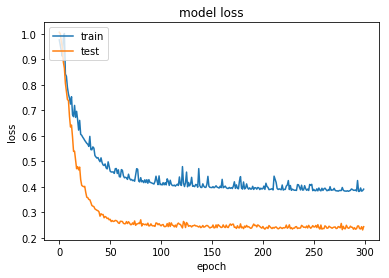

In [3]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD
from keras.utils import plot_model
import pydot
import graphviz
pydot.find_graphviz = lambda: True

model = Sequential()
model.add(Dense(200, input_dim=X_train_scaled.shape[1], init='uniform'))
model.add(Activation('sigmoid'))

model.add(Dense(1, init='uniform'))
model.add(Activation('linear'))

sgd = SGD(lr=0.01)
model.compile(optimizer=sgd,loss='mean_squared_error')

hist = model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), nb_epoch=300,
verbose=1, validation_data=(X_test_scaled.as_matrix(), y_test_scaled.as_matrix()))
print(hist.history.keys())
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

<p>Existe convergencia, y la convergencia es bastante rápida, pero, para llegar a cero, se requerirían demasiados epochs</p>

<h4>Pregunta D</h4>
<p>Repita el paso anterior, utilizado ’Relu’ como función de activación y compare con lo obtenido en d).</p>

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(200, kernel_initializer="uniform", input_dim=13)`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="uniform")`
  
/usr/local/lib/python3.5/dist-packages/keras/models.py:834: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


dict_keys(['val_loss', 'loss'])


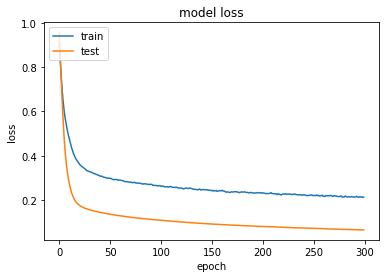

In [4]:

model = Sequential()
model.add(Dense(200, input_dim=X_train_scaled.shape[1], init='uniform'))
model.add(Activation('relu'))

model.add(Dense(1, init='uniform'))
model.add(Activation('linear'))

sgd = SGD(lr=0.01)
model.compile(optimizer=sgd,loss='mean_squared_error')

hist = model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), nb_epoch=300,
verbose=0, validation_data=(X_test_scaled.as_matrix(), y_test_scaled.as_matrix()))
print(hist.history.keys())
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

<h6>Sigmoidal vs Relu </h6>

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(200, kernel_initializer="uniform", input_dim=13)`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="uniform")`
  
/usr/local/lib/python3.5/dist-packages/keras/models.py:834: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


dict_keys(['val_loss', 'loss'])


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(200, kernel_initializer="uniform", input_dim=13)`
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="uniform")`


dict_keys(['val_loss', 'loss'])


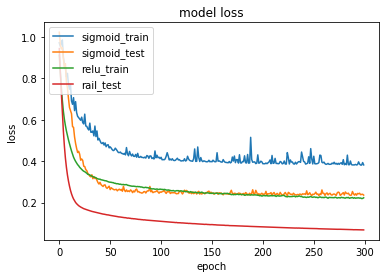

In [5]:

model = Sequential()
model.add(Dense(200, input_dim=X_train_scaled.shape[1], init='uniform'))
model.add(Activation('sigmoid'))

model.add(Dense(1, init='uniform'))
model.add(Activation('linear'))

sgd = SGD(lr=0.01)
model.compile(optimizer=sgd,loss='mean_squared_error')

hist = model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), nb_epoch=300,
verbose=0, validation_data=(X_test_scaled.as_matrix(), y_test_scaled.as_matrix()))
print(hist.history.keys())
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['loss'])


model = Sequential()
model.add(Dense(200, input_dim=X_train_scaled.shape[1], init='uniform'))
model.add(Activation('relu'))

model.add(Dense(1, init='uniform'))
model.add(Activation('linear'))

sgd = SGD(lr=0.01)
model.compile(optimizer=sgd,loss='mean_squared_error')

hist = model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), nb_epoch=300,
verbose=0, validation_data=(X_test_scaled.as_matrix(), y_test_scaled.as_matrix()))
print(hist.history.keys())
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['loss'])



plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['sigmoid_train', 'sigmoid_test', 'relu_train', 'rail_test'], loc='upper left')
plt.show()

<p>Se observa una mejor convergencia con Relu, obteniendo menores valores de error, y con menor cantidad de epochs</p>

<h4>Pregunta E</h4>
<p>Repita c) y d) variando la tasa de aprendizaje (learning rate) en un rango sensible. Comente. Si
observara divergencia durante el entrenamiento, determine si esto ocurre para cada repetición del
experimento.</p>

<h6>Para la función de activación relu </h6>

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(200, kernel_initializer="uniform", input_dim=13)`
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="uniform")`
  if __name__ == '__main__':
/usr/local/lib/python3.5/dist-packages/keras/models.py:834: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


dict_keys(['val_loss', 'loss'])
Lear_rate
0.0


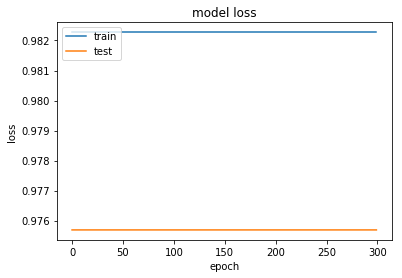

dict_keys(['val_loss', 'loss'])
Lear_rate
0.0526315789474


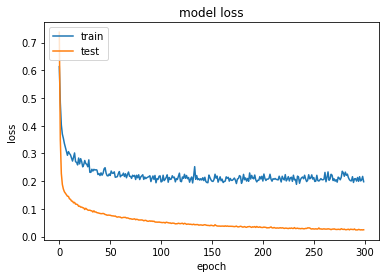

dict_keys(['val_loss', 'loss'])
Lear_rate
0.105263157895


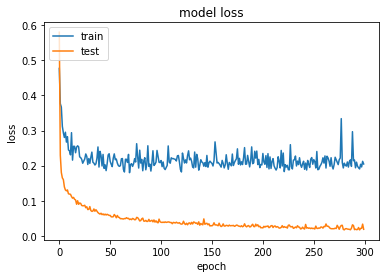

dict_keys(['val_loss', 'loss'])
Lear_rate
0.157894736842


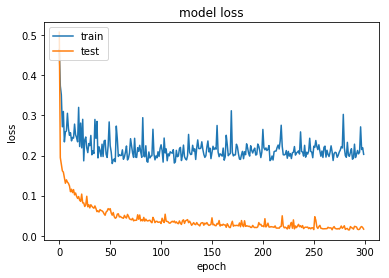

dict_keys(['val_loss', 'loss'])
Lear_rate
0.210526315789


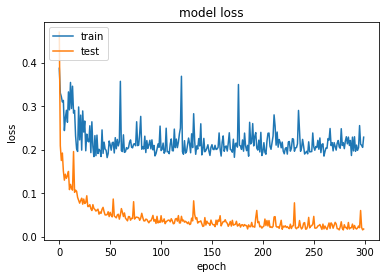

dict_keys(['val_loss', 'loss'])
Lear_rate
0.263157894737


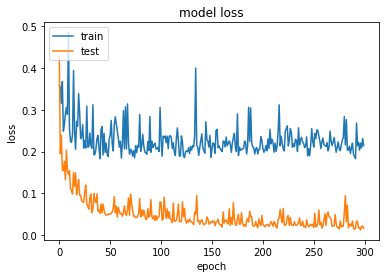

dict_keys(['val_loss', 'loss'])
Lear_rate
0.315789473684


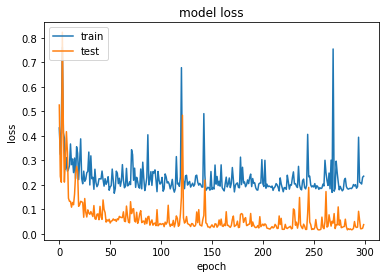

dict_keys(['val_loss', 'loss'])
Lear_rate
0.368421052632


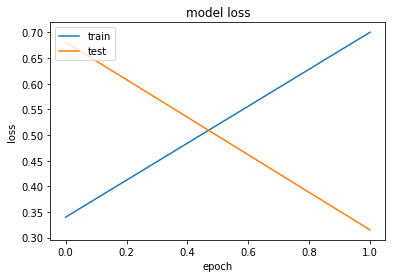

dict_keys(['val_loss', 'loss'])
Lear_rate
0.421052631579


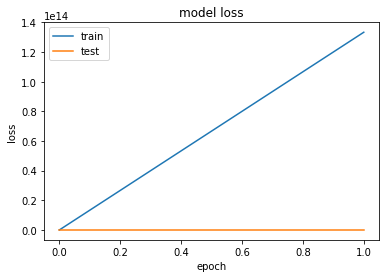

dict_keys(['val_loss', 'loss'])
Lear_rate
0.473684210526


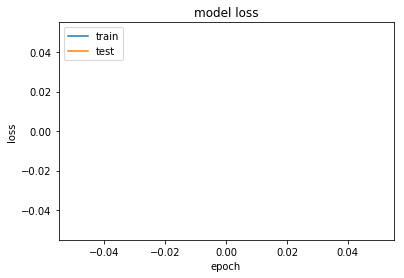

dict_keys(['val_loss', 'loss'])
Lear_rate
0.526315789474


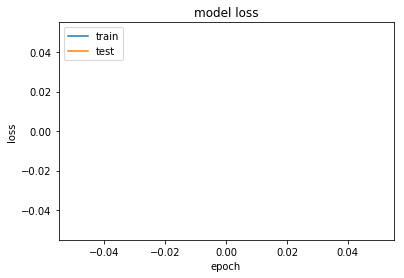

dict_keys(['val_loss', 'loss'])
Lear_rate
0.578947368421


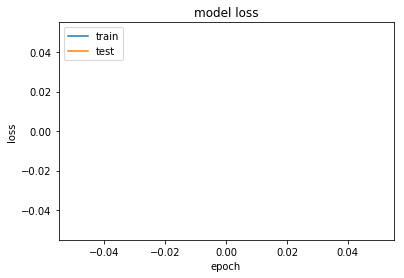

dict_keys(['val_loss', 'loss'])
Lear_rate
0.631578947368


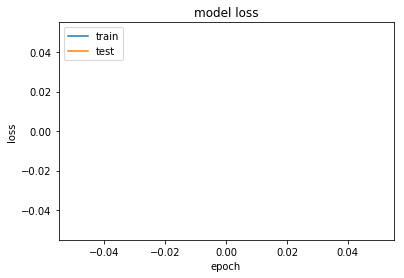

dict_keys(['val_loss', 'loss'])
Lear_rate
0.684210526316


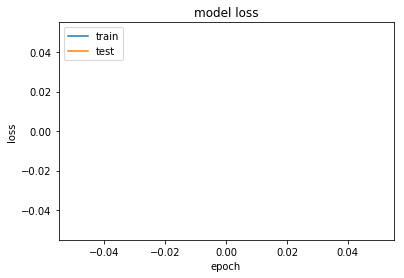

dict_keys(['val_loss', 'loss'])
Lear_rate
0.736842105263


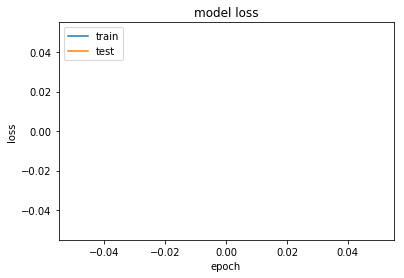

dict_keys(['val_loss', 'loss'])
Lear_rate
0.789473684211


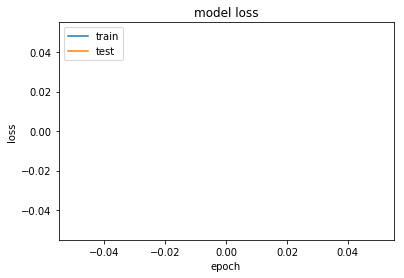

dict_keys(['val_loss', 'loss'])
Lear_rate
0.842105263158


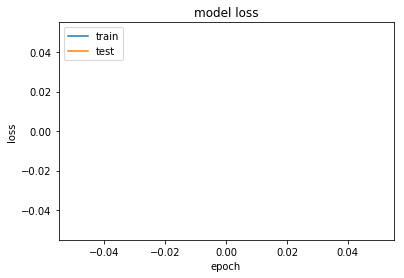

dict_keys(['val_loss', 'loss'])
Lear_rate
0.894736842105


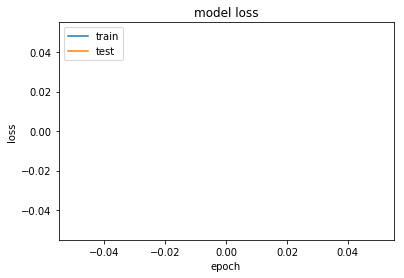

dict_keys(['val_loss', 'loss'])
Lear_rate
0.947368421053


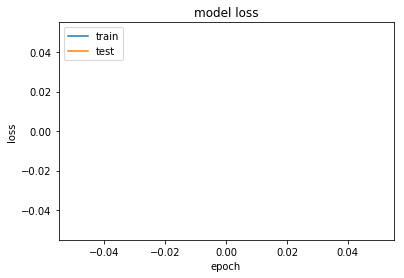

dict_keys(['val_loss', 'loss'])
Lear_rate
1.0


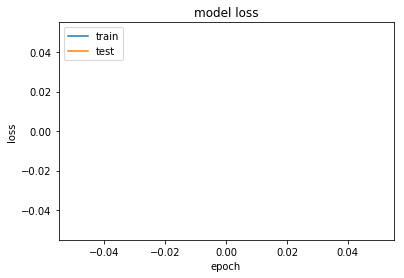

In [6]:
import numpy as np
n_lr = 20
lear_rate = np.linspace(0,1,n_lr)
for i in lear_rate:
    model = Sequential()
    model.add(Dense(200, input_dim=X_train_scaled.shape[1], init='uniform'))
    model.add(Activation('relu'))

    model.add(Dense(1, init='uniform'))
    model.add(Activation('linear'))

    sgd = SGD(lr=i)
    model.compile(optimizer=sgd,loss='mean_squared_error')

    hist = model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), nb_epoch=300,
    verbose=0, validation_data=(X_test_scaled.as_matrix(), y_test_scaled.as_matrix()))
    print(hist.history.keys())
    plt.plot(hist.history['val_loss'])
    plt.plot(hist.history['loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    print("Lear_rate")
    print(i)
    plt.show()


<p>Se observa que learning rate muy grandes, hace que relu diverja, y presente más errores. Con valores sobre 0.15, y bajo 0.37 aproximadamente, se genera una curva muy poco suave. Todo esto se condice con la teoría pues un learning rate muy grande, aumenta la velocidad, empeorando los resultados. </p>

<h6>Para la función de activación sigmoidal </h6>

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(200, kernel_initializer="uniform", input_dim=13)`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="uniform")`
  
/usr/local/lib/python3.5/dist-packages/keras/models.py:834: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


dict_keys(['val_loss', 'loss'])


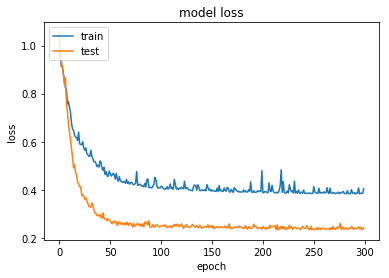

dict_keys(['val_loss', 'loss'])


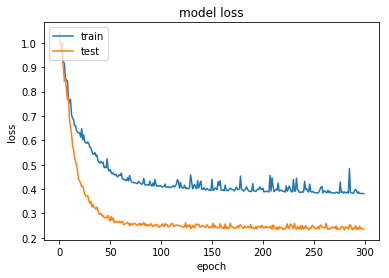

dict_keys(['val_loss', 'loss'])


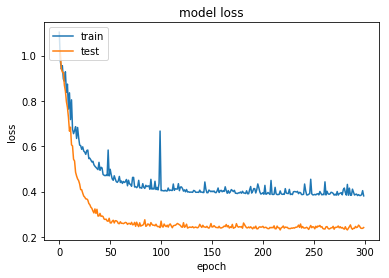

dict_keys(['val_loss', 'loss'])


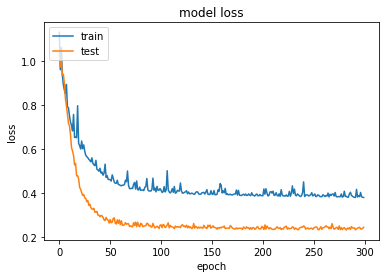

dict_keys(['val_loss', 'loss'])


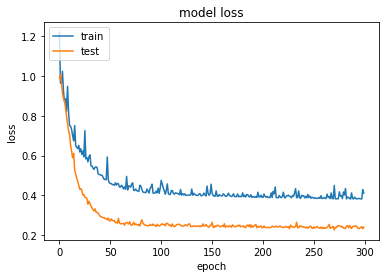

dict_keys(['val_loss', 'loss'])


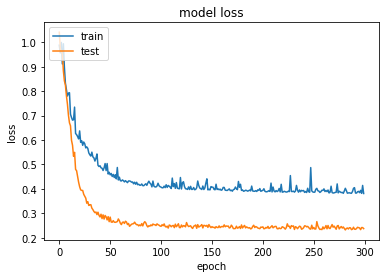

dict_keys(['val_loss', 'loss'])


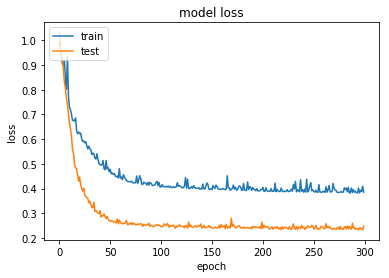

dict_keys(['val_loss', 'loss'])


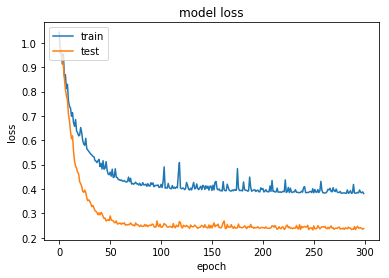

dict_keys(['val_loss', 'loss'])


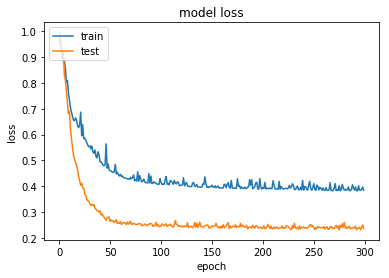

dict_keys(['val_loss', 'loss'])


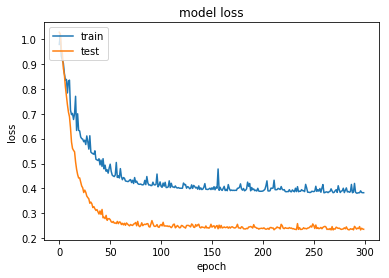

dict_keys(['val_loss', 'loss'])


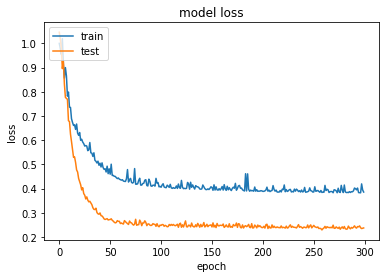

dict_keys(['val_loss', 'loss'])


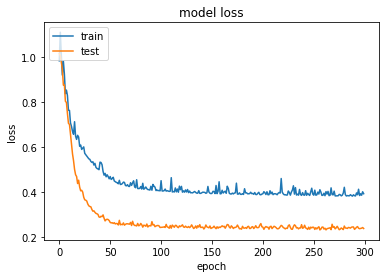

dict_keys(['val_loss', 'loss'])


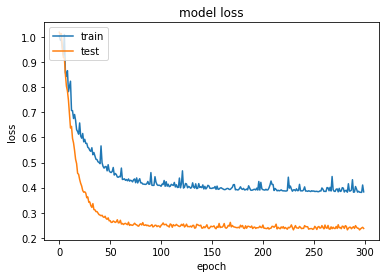

dict_keys(['val_loss', 'loss'])


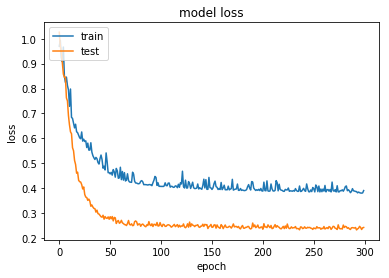

dict_keys(['val_loss', 'loss'])


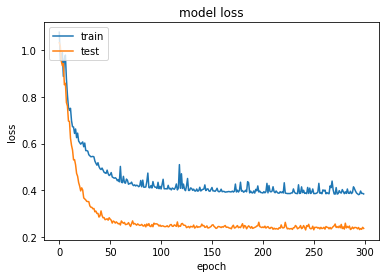

dict_keys(['val_loss', 'loss'])


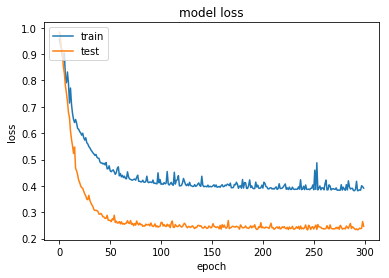

dict_keys(['val_loss', 'loss'])


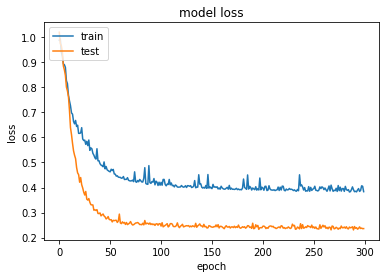

dict_keys(['val_loss', 'loss'])


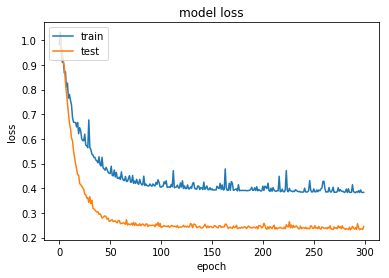

dict_keys(['val_loss', 'loss'])


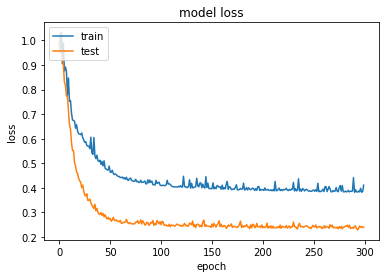

dict_keys(['val_loss', 'loss'])


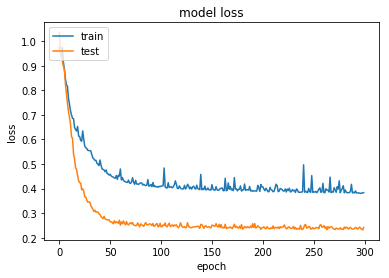

In [7]:
for i in lear_rate:
    model = Sequential()
    model.add(Dense(200, input_dim=X_train_scaled.shape[1], init='uniform'))
    model.add(Activation('sigmoid'))

    model.add(Dense(1, init='uniform'))
    model.add(Activation('linear'))

    sgd = SGD(lr=0.01)
    model.compile(optimizer=sgd,loss='mean_squared_error')

    hist = model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), nb_epoch=300,
    verbose=0, validation_data=(X_test_scaled.as_matrix(), y_test_scaled.as_matrix()))
    print(hist.history.keys())
    plt.plot(hist.history['val_loss'])
    plt.plot(hist.history['loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

<p>En el caso de la función sigmoidal no se ve un gran efecto al modificar los valores de learning rate</p>

<p></p>

<h4>Pregunta F</h4>
<p>Estime el error de predicción de los modelos c) y d) usando validación cruzada con un número de folds
igual a K = 5 y K = 10. Recuerde que para que la estimación sea razonable debe ajustar los pesos del
modelo de nuevo, cada vez que trabaja sobre un determinado fold. Mida el error real del modelo sobre
el conjunto de pruebas, compare y concluya.</p>

<h6>Para la función de activación sigmoidal</h6>

In [8]:
from sklearn import cross_validation
Xm = X_train_scaled.as_matrix()
ym = y_train_scaled.as_matrix()
kfold = cross_validation.KFold(len(Xm), 10)
cvscores = []
for i, (train, val) in enumerate(kfold):
# create model
    model = Sequential()
    model.add(Dense(200, input_dim=Xm.shape[1], init='uniform'))
    model.add(Activation('sigmoid'))
    
    model.add(Dense(1, init='uniform'))
    model.add(Activation('linear'))
    # Compile model
    sgd = SGD(lr=0.2)
    model.compile(optimizer=sgd,loss='mean_squared_error')
    # Fit the model
    model.fit(Xm[train], ym[train], nb_epoch=300)
    # evaluate the model
    scores = model.evaluate(Xm[val], ym[val])
    cvscores.append(scores)
mse_cv = np.mean(cvscores)
print("____________________________________________\n")
print(mse_cv)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(200, kernel_initializer="uniform", input_dim=13)`
  if __name__ == '__main__':
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="uniform")`
  if sys.path[0] == '':
/usr/local/lib/python3.5/dist-packages/keras/models.py:834: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/300
341/341 [==============================] - 0s - loss: 1100171234903034592833306624.0000
Epoch 2/300
341/341 [==============================] - 0s - loss: nan                                      
Epoch 3/300
341/341 [==============================] - 0s - loss: nan     
Epoch 4/300
341/341 [==============================] - 0s - loss: nan     
Epoch 5/300
341/341 [==============================] - 0s - loss: nan     
Epoch 6/300
341/341 [==============================] - 0s - loss: nan     
Epoch 7/300
341/341 [==============================] - 0s - loss: nan     
Epoch 8/300
341/341 [==============================] - 0s - loss: nan     
Epoch 9/300
341/341 [==============================] - 0s - loss: nan     
Epoch 10/300
341/341 [==============================] - 0s - loss: nan     
Epoch 11/300
341/341 [==============================] - 0s - loss: nan     
Epoch 12/300
341/341 [==============================] - 0s - loss: nan     
Epoch 13/300
341/341 [=================

341/341 [==============================] - 0s - loss: nan     
Epoch 213/300
341/341 [==============================] - 0s - loss: nan     
Epoch 214/300
341/341 [==============================] - 0s - loss: nan     
Epoch 215/300
341/341 [==============================] - 0s - loss: nan     
Epoch 216/300
341/341 [==============================] - 0s - loss: nan     
Epoch 217/300
341/341 [==============================] - 0s - loss: nan     
Epoch 218/300
341/341 [==============================] - 0s - loss: nan     
Epoch 219/300
341/341 [==============================] - 0s - loss: nan     
Epoch 220/300
341/341 [==============================] - 0s - loss: nan     
Epoch 221/300
341/341 [==============================] - 0s - loss: nan     
Epoch 222/300
341/341 [==============================] - 0s - loss: nan     
Epoch 223/300
341/341 [==============================] - 0s - loss: nan     
Epoch 224/300
341/341 [==============================] - 0s - loss: nan     
Epoch 225/300

341/341 [==============================] - 0s - loss: nan     
Epoch 125/300
341/341 [==============================] - 0s - loss: nan     
Epoch 126/300
341/341 [==============================] - 0s - loss: nan     
Epoch 127/300
341/341 [==============================] - 0s - loss: nan     
Epoch 128/300
341/341 [==============================] - 0s - loss: nan     
Epoch 129/300
341/341 [==============================] - 0s - loss: nan     
Epoch 130/300
341/341 [==============================] - 0s - loss: nan     
Epoch 131/300
341/341 [==============================] - 0s - loss: nan     
Epoch 132/300
341/341 [==============================] - 0s - loss: nan     
Epoch 133/300
341/341 [==============================] - 0s - loss: nan     
Epoch 134/300
341/341 [==============================] - 0s - loss: nan     
Epoch 135/300
341/341 [==============================] - ETA: 0s - loss: n - 0s - loss: nan     
Epoch 136/300
341/341 [==============================] - 0s - loss: na

341/341 [==============================] - 0s - loss: nan     
Epoch 231/300
341/341 [==============================] - 0s - loss: nan     
Epoch 232/300
341/341 [==============================] - 0s - loss: nan     
Epoch 233/300
341/341 [==============================] - 0s - loss: nan     
Epoch 234/300
341/341 [==============================] - 0s - loss: nan     
Epoch 235/300
341/341 [==============================] - 0s - loss: nan     
Epoch 236/300
341/341 [==============================] - 0s - loss: nan     
Epoch 237/300
341/341 [==============================] - 0s - loss: nan     
Epoch 238/300
341/341 [==============================] - 0s - loss: nan     
Epoch 239/300
341/341 [==============================] - 0s - loss: nan     
Epoch 240/300
341/341 [==============================] - 0s - loss: nan     
Epoch 241/300
341/341 [==============================] - 0s - loss: nan     
Epoch 242/300
341/341 [==============================] - 0s - loss: nan     
Epoch 243/300

341/341 [==============================] - 0s - loss: nan     
Epoch 142/300
341/341 [==============================] - 0s - loss: nan     
Epoch 143/300
341/341 [==============================] - 0s - loss: nan     
Epoch 144/300
341/341 [==============================] - 0s - loss: nan     
Epoch 145/300
341/341 [==============================] - 0s - loss: nan     
Epoch 146/300
341/341 [==============================] - 0s - loss: nan     
Epoch 147/300
341/341 [==============================] - 0s - loss: nan     
Epoch 148/300
341/341 [==============================] - 0s - loss: nan     
Epoch 149/300
341/341 [==============================] - 0s - loss: nan     
Epoch 150/300
341/341 [==============================] - ETA: 0s - loss: n - 0s - loss: nan     
Epoch 151/300
341/341 [==============================] - 0s - loss: nan     
Epoch 152/300
341/341 [==============================] - 0s - loss: nan     
Epoch 153/300
341/341 [==============================] - 0s - loss: na

341/341 [==============================] - 0s - loss: nan     
Epoch 53/300
341/341 [==============================] - 0s - loss: nan     
Epoch 54/300
341/341 [==============================] - 0s - loss: nan     
Epoch 55/300
341/341 [==============================] - 0s - loss: nan     
Epoch 56/300
341/341 [==============================] - 0s - loss: nan     
Epoch 57/300
341/341 [==============================] - 0s - loss: nan     
Epoch 58/300
341/341 [==============================] - 0s - loss: nan     
Epoch 59/300
341/341 [==============================] - 0s - loss: nan     
Epoch 60/300
341/341 [==============================] - 0s - loss: nan     
Epoch 61/300
341/341 [==============================] - 0s - loss: nan     
Epoch 62/300
341/341 [==============================] - 0s - loss: nan     
Epoch 63/300
341/341 [==============================] - 0s - loss: nan     
Epoch 64/300
341/341 [==============================] - 0s - loss: nan     
Epoch 65/300
341/341 [===

341/341 [==============================] - 0s - loss: nan     
Epoch 159/300
341/341 [==============================] - 0s - loss: nan     
Epoch 160/300
341/341 [==============================] - 0s - loss: nan     
Epoch 161/300
341/341 [==============================] - 0s - loss: nan     
Epoch 162/300
341/341 [==============================] - 0s - loss: nan     
Epoch 163/300
341/341 [==============================] - 0s - loss: nan     
Epoch 164/300
341/341 [==============================] - 0s - loss: nan     
Epoch 165/300
341/341 [==============================] - 0s - loss: nan     
Epoch 166/300
341/341 [==============================] - 0s - loss: nan     
Epoch 167/300
341/341 [==============================] - 0s - loss: nan     
Epoch 168/300
341/341 [==============================] - 0s - loss: nan     
Epoch 169/300
341/341 [==============================] - 0s - loss: nan     
Epoch 170/300
341/341 [==============================] - 0s - loss: nan     
Epoch 171/300

341/341 [==============================] - 0s - loss: nan     
Epoch 70/300
341/341 [==============================] - 0s - loss: nan     
Epoch 71/300
341/341 [==============================] - 0s - loss: nan     
Epoch 72/300
341/341 [==============================] - 0s - loss: nan     
Epoch 73/300
341/341 [==============================] - 0s - loss: nan     
Epoch 74/300
341/341 [==============================] - 0s - loss: nan     
Epoch 75/300
341/341 [==============================] - 0s - loss: nan     
Epoch 76/300
341/341 [==============================] - 0s - loss: nan     
Epoch 77/300
341/341 [==============================] - 0s - loss: nan     
Epoch 78/300
341/341 [==============================] - 0s - loss: nan     
Epoch 79/300
341/341 [==============================] - 0s - loss: nan     
Epoch 80/300
341/341 [==============================] - 0s - loss: nan     
Epoch 81/300
341/341 [==============================] - 0s - loss: nan     
Epoch 82/300
341/341 [===

341/341 [==============================] - 0s - loss: nan     
Epoch 282/300
341/341 [==============================] - 0s - loss: nan     
Epoch 283/300
341/341 [==============================] - 0s - loss: nan     
Epoch 284/300
341/341 [==============================] - 0s - loss: nan     
Epoch 285/300
341/341 [==============================] - 0s - loss: nan     
Epoch 286/300
341/341 [==============================] - 0s - loss: nan     
Epoch 287/300
341/341 [==============================] - 0s - loss: nan     
Epoch 288/300
341/341 [==============================] - 0s - loss: nan     
Epoch 289/300
341/341 [==============================] - 0s - loss: nan     
Epoch 290/300
341/341 [==============================] - 0s - loss: nan     
Epoch 291/300
341/341 [==============================] - 0s - loss: nan     
Epoch 292/300
341/341 [==============================] - 0s - loss: nan     
Epoch 293/300
341/341 [==============================] - 0s - loss: nan     
Epoch 294/300

341/341 [==============================] - 0s - loss: nan     
Epoch 194/300
341/341 [==============================] - 0s - loss: nan     
Epoch 195/300
341/341 [==============================] - 0s - loss: nan     
Epoch 196/300
341/341 [==============================] - 0s - loss: nan     
Epoch 197/300
341/341 [==============================] - 0s - loss: nan     
Epoch 198/300
341/341 [==============================] - 0s - loss: nan     
Epoch 199/300
341/341 [==============================] - 0s - loss: nan     
Epoch 200/300
341/341 [==============================] - 0s - loss: nan     
Epoch 201/300
341/341 [==============================] - 0s - loss: nan     
Epoch 202/300
341/341 [==============================] - 0s - loss: nan     
Epoch 203/300
341/341 [==============================] - 0s - loss: nan     
Epoch 204/300
341/341 [==============================] - 0s - loss: nan     
Epoch 205/300
341/341 [==============================] - 0s - loss: nan     
Epoch 206/300

341/341 [==============================] - 0s - loss: nan     
Epoch 105/300
341/341 [==============================] - 0s - loss: nan     
Epoch 106/300
341/341 [==============================] - 0s - loss: nan     
Epoch 107/300
341/341 [==============================] - 0s - loss: nan     
Epoch 108/300
341/341 [==============================] - 0s - loss: nan     
Epoch 109/300
341/341 [==============================] - 0s - loss: nan     
Epoch 110/300
341/341 [==============================] - 0s - loss: nan     
Epoch 111/300
341/341 [==============================] - 0s - loss: nan     
Epoch 112/300
341/341 [==============================] - 0s - loss: nan     
Epoch 113/300
341/341 [==============================] - 0s - loss: nan     
Epoch 114/300
341/341 [==============================] - 0s - loss: nan     
Epoch 115/300
341/341 [==============================] - 0s - loss: nan     
Epoch 116/300
341/341 [==============================] - 0s - loss: nan     
Epoch 117/300

341/341 [==============================] - 0s - loss: nan     
Epoch 15/300
341/341 [==============================] - 0s - loss: nan     
Epoch 16/300
341/341 [==============================] - 0s - loss: nan     
Epoch 17/300
341/341 [==============================] - 0s - loss: nan     
Epoch 18/300
341/341 [==============================] - 0s - loss: nan     
Epoch 19/300
341/341 [==============================] - 0s - loss: nan     
Epoch 20/300
341/341 [==============================] - 0s - loss: nan     
Epoch 21/300
341/341 [==============================] - 0s - loss: nan     
Epoch 22/300
341/341 [==============================] - 0s - loss: nan     
Epoch 23/300
341/341 [==============================] - 0s - loss: nan     
Epoch 24/300
341/341 [==============================] - 0s - loss: nan     
Epoch 25/300
341/341 [==============================] - 0s - loss: nan     
Epoch 26/300
341/341 [==============================] - 0s - loss: nan     
Epoch 27/300
341/341 [===

341/341 [==============================] - 0s - loss: nan     
Epoch 226/300
341/341 [==============================] - 0s - loss: nan     
Epoch 227/300
341/341 [==============================] - 0s - loss: nan     
Epoch 228/300
341/341 [==============================] - 0s - loss: nan     
Epoch 229/300
341/341 [==============================] - 0s - loss: nan     
Epoch 230/300
341/341 [==============================] - 0s - loss: nan     
Epoch 231/300
341/341 [==============================] - 0s - loss: nan     
Epoch 232/300
341/341 [==============================] - 0s - loss: nan     
Epoch 233/300
341/341 [==============================] - 0s - loss: nan     
Epoch 234/300
341/341 [==============================] - 0s - loss: nan     
Epoch 235/300
341/341 [==============================] - 0s - loss: nan     
Epoch 236/300
341/341 [==============================] - 0s - loss: nan     
Epoch 237/300
341/341 [==============================] - 0s - loss: nan     
Epoch 238/300

341/341 [==============================] - 0s - loss: nan     
Epoch 137/300
341/341 [==============================] - 0s - loss: nan     
Epoch 138/300
341/341 [==============================] - 0s - loss: nan     
Epoch 139/300
341/341 [==============================] - 0s - loss: nan     
Epoch 140/300
341/341 [==============================] - 0s - loss: nan     
Epoch 141/300
341/341 [==============================] - 0s - loss: nan     
Epoch 142/300
341/341 [==============================] - 0s - loss: nan     
Epoch 143/300
341/341 [==============================] - 0s - loss: nan     
Epoch 144/300
341/341 [==============================] - 0s - loss: nan     
Epoch 145/300
341/341 [==============================] - 0s - loss: nan     
Epoch 146/300
341/341 [==============================] - 0s - loss: nan     
Epoch 147/300
341/341 [==============================] - 0s - loss: nan     
Epoch 148/300
341/341 [==============================] - 0s - loss: nan     
Epoch 149/300

Epoch 47/300
342/342 [==============================] - 0s - loss: nan     
Epoch 48/300
342/342 [==============================] - 0s - loss: nan     
Epoch 49/300
342/342 [==============================] - 0s - loss: nan     
Epoch 50/300
342/342 [==============================] - 0s - loss: nan     
Epoch 51/300
342/342 [==============================] - 0s - loss: nan     
Epoch 52/300
342/342 [==============================] - 0s - loss: nan     
Epoch 53/300
342/342 [==============================] - 0s - loss: nan     
Epoch 54/300
342/342 [==============================] - 0s - loss: nan     
Epoch 55/300
342/342 [==============================] - 0s - loss: nan     
Epoch 56/300
342/342 [==============================] - 0s - loss: nan     
Epoch 57/300
342/342 [==============================] - 0s - loss: nan     
Epoch 58/300
342/342 [==============================] - 0s - loss: nan     
Epoch 59/300
342/342 [==============================] - 0s - loss: nan     
Epoch 60/300

342/342 [==============================] - 0s - loss: nan     
Epoch 155/300
342/342 [==============================] - 0s - loss: nan     
Epoch 156/300
342/342 [==============================] - 0s - loss: nan     
Epoch 157/300
342/342 [==============================] - 0s - loss: nan     
Epoch 158/300
342/342 [==============================] - 0s - loss: nan     
Epoch 159/300
342/342 [==============================] - 0s - loss: nan     
Epoch 160/300
342/342 [==============================] - 0s - loss: nan     
Epoch 161/300
342/342 [==============================] - 0s - loss: nan     
Epoch 162/300
342/342 [==============================] - 0s - loss: nan     
Epoch 163/300
342/342 [==============================] - 0s - loss: nan     
Epoch 164/300
342/342 [==============================] - 0s - loss: nan     
Epoch 165/300
342/342 [==============================] - 0s - loss: nan     
Epoch 166/300
342/342 [==============================] - 0s - loss: nan     
Epoch 167/300

<h6>Para la función de activación Relu</h6>

In [9]:
from sklearn import cross_validation
Xm = X_train_scaled.as_matrix()
ym = y_train_scaled.as_matrix()
kfold = cross_validation.KFold(len(Xm), 5)
cvscores = []
for i, (train, val) in enumerate(kfold):
# create model
    model = Sequential()
    model.add(Dense(200, input_dim=Xm.shape[1], init='uniform'))
    model.add(Activation('relu'))
    model.add(Dense(1, init='uniform'))
    model.add(Activation('linear'))
    # Compile model
    sgd = SGD(lr=0.2)
    model.compile(optimizer=sgd,loss='mean_squared_error')
    # Fit the model
    model.fit(Xm[train], ym[train], nb_epoch=300)
    # evaluate the model
    scores = model.evaluate(Xm[val], ym[val])
    cvscores.append(scores)
mse_cv = np.mean(cvscores)
print("____________________________________________\n")
print(mse_cv)

Epoch 1/300


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(200, kernel_initializer="uniform", input_dim=13)`
  if __name__ == '__main__':
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="uniform")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.5/dist-packages/keras/models.py:834: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


303/303 [==============================] - 0s - loss: 0.5412     
Epoch 2/300
303/303 [==============================] - 0s - loss: 0.2278     
Epoch 3/300
303/303 [==============================] - 0s - loss: 0.2119     
Epoch 4/300
303/303 [==============================] - 0s - loss: 0.1784     
Epoch 5/300
303/303 [==============================] - 0s - loss: 0.1578     
Epoch 6/300
303/303 [==============================] - 0s - loss: 0.1500     
Epoch 7/300
303/303 [==============================] - 0s - loss: 0.1498     
Epoch 8/300
303/303 [==============================] - 0s - loss: 0.1324     
Epoch 9/300
303/303 [==============================] - 0s - loss: 0.1332     
Epoch 10/300
303/303 [==============================] - 0s - loss: 0.1517     
Epoch 11/300
303/303 [==============================] - 0s - loss: 0.1383     
Epoch 12/300
303/303 [==============================] - 0s - loss: 0.1111     
Epoch 13/300
303/303 [==============================] - 0s - loss: 0.0900

303/303 [==============================] - 0s - loss: 0.0173     
Epoch 207/300
303/303 [==============================] - 0s - loss: 0.0180     
Epoch 208/300
303/303 [==============================] - 0s - loss: 0.0188     
Epoch 209/300
303/303 [==============================] - 0s - loss: 0.0193     
Epoch 210/300
303/303 [==============================] - 0s - loss: 0.0168     
Epoch 211/300
303/303 [==============================] - 0s - loss: 0.0167     
Epoch 212/300
303/303 [==============================] - 0s - loss: 0.0167     
Epoch 213/300
303/303 [==============================] - 0s - loss: 0.0186     
Epoch 214/300
303/303 [==============================] - 0s - loss: 0.0239     
Epoch 215/300
303/303 [==============================] - 0s - loss: 0.0196     
Epoch 216/300
303/303 [==============================] - 0s - loss: 0.0293     
Epoch 217/300
303/303 [==============================] - 0s - loss: 0.0226     
Epoch 218/300
303/303 [==============================]

303/303 [==============================] - 0s - loss: 0.0331     
Epoch 112/300
303/303 [==============================] - 0s - loss: 0.0400     
Epoch 113/300
303/303 [==============================] - 0s - loss: 0.0312     
Epoch 114/300
303/303 [==============================] - 0s - loss: 0.0366     
Epoch 115/300
303/303 [==============================] - 0s - loss: 0.0324     
Epoch 116/300
303/303 [==============================] - 0s - loss: 0.0305     
Epoch 117/300
303/303 [==============================] - 0s - loss: 0.0261     
Epoch 118/300
303/303 [==============================] - 0s - loss: 0.0289     
Epoch 119/300
303/303 [==============================] - 0s - loss: 0.0248     
Epoch 120/300
303/303 [==============================] - 0s - loss: 0.0322     
Epoch 121/300
303/303 [==============================] - 0s - loss: 0.0402     
Epoch 122/300
303/303 [==============================] - 0s - loss: 0.0285     
Epoch 123/300
303/303 [==============================]

303/303 [==============================] - 0s - loss: 0.1063     
Epoch 16/300
303/303 [==============================] - 0s - loss: 0.1056     
Epoch 17/300
303/303 [==============================] - 0s - loss: 0.1070     
Epoch 18/300
303/303 [==============================] - 0s - loss: 0.0919     
Epoch 19/300
303/303 [==============================] - 0s - loss: 0.0843     
Epoch 20/300
303/303 [==============================] - 0s - loss: 0.0910     
Epoch 21/300
303/303 [==============================] - 0s - loss: 0.0883     
Epoch 22/300
303/303 [==============================] - 0s - loss: 0.0876     
Epoch 23/300
303/303 [==============================] - 0s - loss: 0.0838     
Epoch 24/300
303/303 [==============================] - 0s - loss: 0.1119     
Epoch 25/300
303/303 [==============================] - 0s - loss: 0.0991     
Epoch 26/300
303/303 [==============================] - 0s - loss: 0.0897     
Epoch 27/300
303/303 [==============================] - 0s - loss

303/303 [==============================] - 0s - loss: 0.0283     
Epoch 119/300
303/303 [==============================] - 0s - loss: 0.0306     
Epoch 120/300
303/303 [==============================] - 0s - loss: 0.0399     
Epoch 121/300
303/303 [==============================] - 0s - loss: 0.0293     
Epoch 122/300
303/303 [==============================] - 0s - loss: 0.0366     
Epoch 123/300
303/303 [==============================] - 0s - loss: 0.0251     
Epoch 124/300
303/303 [==============================] - 0s - loss: 0.0387     
Epoch 125/300
303/303 [==============================] - 0s - loss: 0.0297     
Epoch 126/300
303/303 [==============================] - 0s - loss: 0.0320     
Epoch 127/300
303/303 [==============================] - 0s - loss: 0.0274     
Epoch 128/300
303/303 [==============================] - 0s - loss: 0.0252     
Epoch 129/300
303/303 [==============================] - 0s - loss: 0.0247     
Epoch 130/300
303/303 [==============================]

303/303 [==============================] - 0s - loss: 0.0947     
Epoch 22/300
303/303 [==============================] - 0s - loss: 0.0931     
Epoch 23/300
303/303 [==============================] - 0s - loss: 0.0757     
Epoch 24/300
303/303 [==============================] - 0s - loss: 0.0847     
Epoch 25/300
303/303 [==============================] - 0s - loss: 0.0794     
Epoch 26/300
303/303 [==============================] - 0s - loss: 0.0721     
Epoch 27/300
303/303 [==============================] - ETA: 0s - loss: 0.092 - 0s - loss: 0.0703     
Epoch 28/300
303/303 [==============================] - 0s - loss: 0.0764     
Epoch 29/300
303/303 [==============================] - 0s - loss: 0.0655     
Epoch 30/300
303/303 [==============================] - 0s - loss: 0.0790     
Epoch 31/300
303/303 [==============================] - 0s - loss: 0.0735     
Epoch 32/300
303/303 [==============================] - 0s - loss: 0.0924     
Epoch 33/300
303/303 [===================

303/303 [==============================] - 0s - loss: 0.0296     
Epoch 225/300
303/303 [==============================] - 0s - loss: 0.0253     
Epoch 226/300
303/303 [==============================] - 0s - loss: 0.0177     
Epoch 227/300
303/303 [==============================] - 0s - loss: 0.0237     
Epoch 228/300
303/303 [==============================] - 0s - loss: 0.0203     
Epoch 229/300
303/303 [==============================] - 0s - loss: 0.0191     
Epoch 230/300
303/303 [==============================] - 0s - loss: 0.0180     
Epoch 231/300
303/303 [==============================] - 0s - loss: 0.0191     
Epoch 232/300
303/303 [==============================] - 0s - loss: 0.0297     
Epoch 233/300
303/303 [==============================] - 0s - loss: 0.0160     
Epoch 234/300
303/303 [==============================] - 0s - loss: 0.0179     
Epoch 235/300
303/303 [==============================] - 0s - loss: 0.0224     
Epoch 236/300
303/303 [==============================]

304/304 [==============================] - 0s - loss: 0.0794     
Epoch 27/300
304/304 [==============================] - 0s - loss: 0.0971     
Epoch 28/300
304/304 [==============================] - 0s - loss: 0.0690     
Epoch 29/300
304/304 [==============================] - 0s - loss: 0.0694     
Epoch 30/300
304/304 [==============================] - 0s - loss: 0.0817     
Epoch 31/300
304/304 [==============================] - 0s - loss: 0.0788     
Epoch 32/300
304/304 [==============================] - 0s - loss: 0.0741     
Epoch 33/300
304/304 [==============================] - 0s - loss: 0.0781     
Epoch 34/300
304/304 [==============================] - 0s - loss: 0.0712     
Epoch 35/300
304/304 [==============================] - 0s - loss: 0.0783     
Epoch 36/300
304/304 [==============================] - 0s - loss: 0.0756     
Epoch 37/300
304/304 [==============================] - 0s - loss: 0.0710     
Epoch 38/300
304/304 [==============================] - 0s - loss

304/304 [==============================] - 0s - loss: 0.0184     
Epoch 230/300
304/304 [==============================] - 0s - loss: 0.0246     
Epoch 231/300
304/304 [==============================] - 0s - loss: 0.0338     
Epoch 232/300
304/304 [==============================] - 0s - loss: 0.0261     
Epoch 233/300
304/304 [==============================] - 0s - loss: 0.0350     
Epoch 234/300
304/304 [==============================] - 0s - loss: 0.0233     
Epoch 235/300
304/304 [==============================] - 0s - loss: 0.0200     
Epoch 236/300
304/304 [==============================] - 0s - loss: 0.0241     
Epoch 237/300
304/304 [==============================] - 0s - loss: 0.0263     
Epoch 238/300
304/304 [==============================] - 0s - loss: 0.0282     
Epoch 239/300
304/304 [==============================] - 0s - loss: 0.0286     
Epoch 240/300
304/304 [==============================] - 0s - loss: 0.0178     
Epoch 241/300
304/304 [==============================]

<p>El error de predicción para el sigmoidal no pudo ser calculado, en cambio, para relu el error de predicción es 0.129. Por esto es imposible hacer la comparación.</p>

<h4>Pregunta G</h4>
<p>Entrene los modelos considerados en c) y d) usando progressive decay Compare y comente.</p>


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(200, kernel_initializer="uniform", input_dim=13)`
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="uniform")`
  if __name__ == '__main__':
/usr/local/lib/python3.5/dist-packages/keras/models.py:834: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


dict_keys(['val_loss', 'loss'])


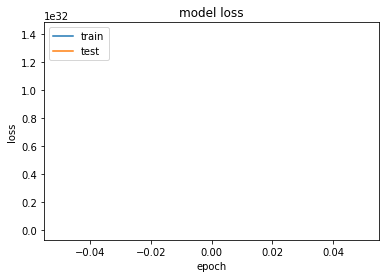

dict_keys(['val_loss', 'loss'])


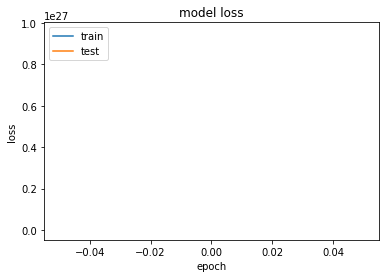

dict_keys(['val_loss', 'loss'])


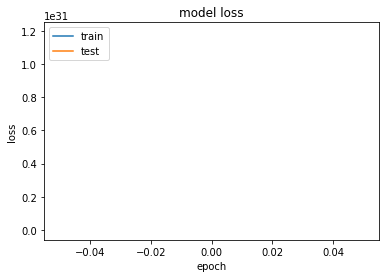

dict_keys(['val_loss', 'loss'])


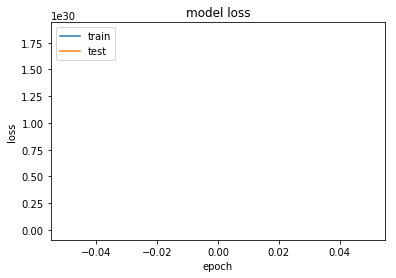

dict_keys(['val_loss', 'loss'])


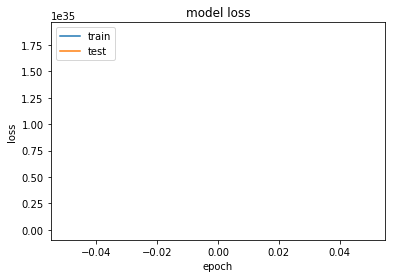

dict_keys(['val_loss', 'loss'])


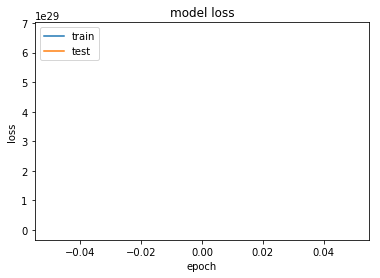

dict_keys(['val_loss', 'loss'])


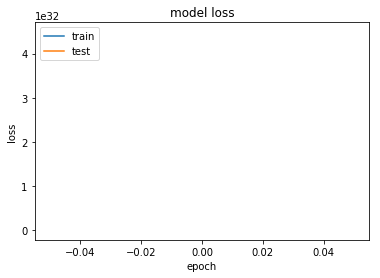

dict_keys(['val_loss', 'loss'])


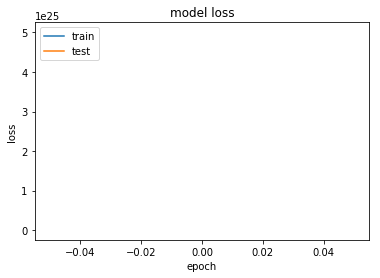

dict_keys(['val_loss', 'loss'])


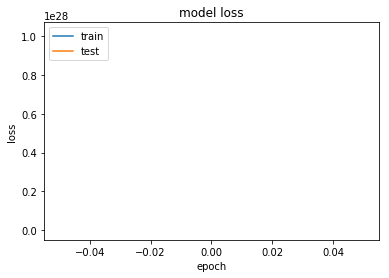

dict_keys(['val_loss', 'loss'])


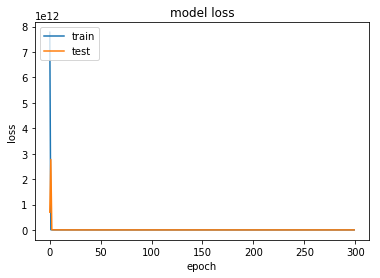

In [10]:
n_decay = 10
lear_decay = np.logspace(-6,0,n_decay)
for i in lear_decay:

    model = Sequential()
    model.add(Dense(200, input_dim=X_train_scaled.shape[1], init='uniform'))
    model.add(Activation('sigmoid'))

    model.add(Dense(1, init='uniform'))
    model.add(Activation('linear'))

    sgd = SGD(lr=0.2, decay=i)
    model.compile(optimizer=sgd,loss='mean_squared_error')

    hist = model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), nb_epoch=300,
    verbose=0, validation_data=(X_test_scaled.as_matrix(), y_test_scaled.as_matrix()))
    print(hist.history.keys())
    plt.plot(hist.history['val_loss'])
    plt.plot(hist.history['loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(200, kernel_initializer="uniform", input_dim=13)`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="uniform")`
  
/usr/local/lib/python3.5/dist-packages/keras/models.py:834: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


dict_keys(['val_loss', 'loss'])


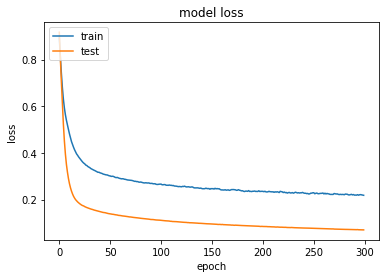

dict_keys(['val_loss', 'loss'])


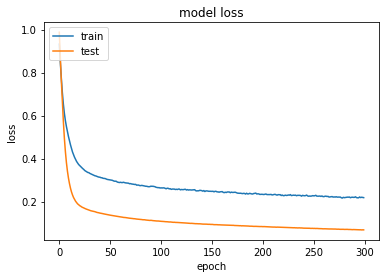

dict_keys(['val_loss', 'loss'])


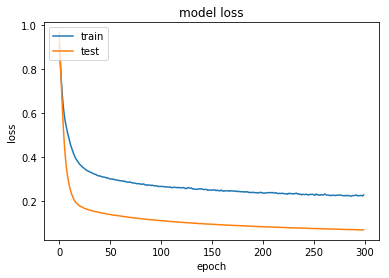

dict_keys(['val_loss', 'loss'])


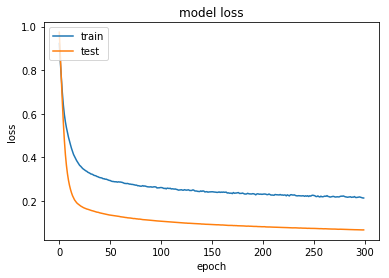

dict_keys(['val_loss', 'loss'])


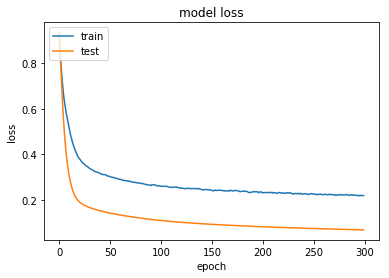

dict_keys(['val_loss', 'loss'])


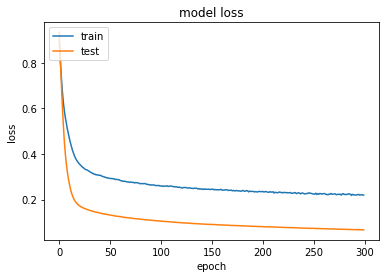

dict_keys(['val_loss', 'loss'])


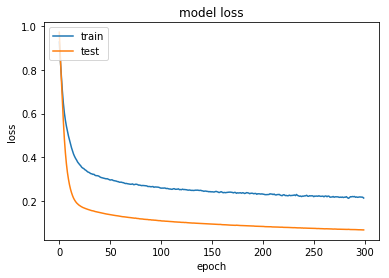

dict_keys(['val_loss', 'loss'])


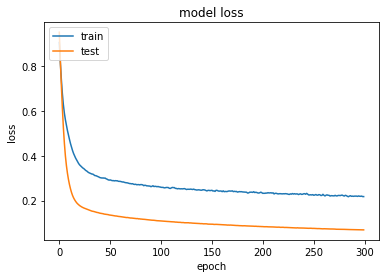

dict_keys(['val_loss', 'loss'])


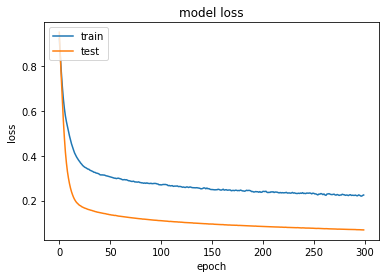

dict_keys(['val_loss', 'loss'])


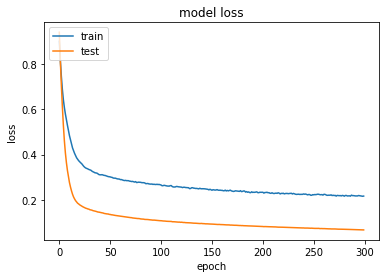

In [ ]:
for i in lear_decay:
    model = Sequential()
    model.add(Dense(200, input_dim=X_train_scaled.shape[1], init='uniform'))
    model.add(Activation('relu'))

    model.add(Dense(1, init='uniform'))
    model.add(Activation('linear'))

    sgd = SGD(lr=0.01)
    model.compile(optimizer=sgd,loss='mean_squared_error')

    hist = model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), nb_epoch=300,
    verbose=0, validation_data=(X_test_scaled.as_matrix(), y_test_scaled.as_matrix()))
    print(hist.history.keys())
    plt.plot(hist.history['val_loss'])
    plt.plot(hist.history['loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

<p>Al usar progressive decay en sigmoidal no se obtienen resultados, lo que hace pensar que diverge. En el caso de relu, no existe un mayor efecto que permita decir si es útil o no utilizarlo</p>

<h4>Pregunta H</h4>
<p>Entrene los modelos considerados en c) y d) usando momentum. Experimente usando momentum
cl´asico y momentum de Nesterov. ¿Observa un mejor resultado final? ¿Observa una mayor velocidad
de convergencia sobre el dataset de entrenamiento? ¿Sobre el dataset de pruebas?</p>

<h6>Para sigmoidal</h6>

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(200, kernel_initializer="uniform", input_dim=13)`
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="uniform")`
  if __name__ == '__main__':
/usr/local/lib/python3.5/dist-packages/keras/models.py:834: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


dict_keys(['val_loss', 'loss'])


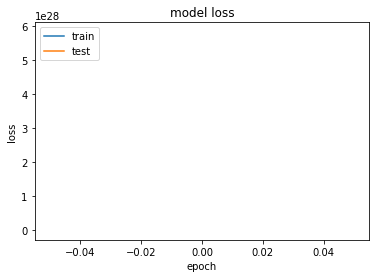

dict_keys(['val_loss', 'loss'])


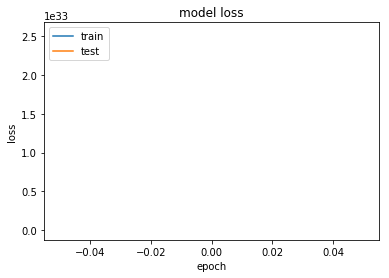

dict_keys(['val_loss', 'loss'])


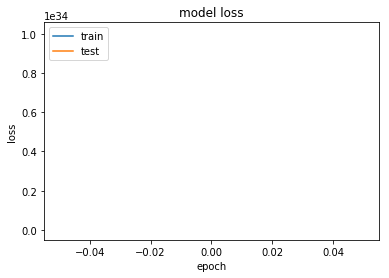

In [ ]:
n_decay = 21
momentum = np.linspace(0,1,n_decay)

for x in momentum:
    model = Sequential()
    model.add(Dense(200, input_dim=X_train_scaled.shape[1], init='uniform'))
    model.add(Activation('sigmoid'))

    model.add(Dense(1, init='uniform'))
    model.add(Activation('linear'))

    sgd = SGD(lr=0.2,momentum=x)
    model.compile(optimizer=sgd,loss='mean_squared_error')

    hist = model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), nb_epoch=300,
    verbose=0, validation_data=(X_test_scaled.as_matrix(), y_test_scaled.as_matrix()))
    print(hist.history.keys())
    plt.plot(hist.history['val_loss'])
    plt.plot(hist.history['loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

<h6>Para relu</h6>

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(200, kernel_initializer="uniform", input_dim=13)`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="uniform")`
  
/usr/local/lib/python3.5/dist-packages/keras/models.py:834: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


dict_keys(['val_loss', 'loss'])


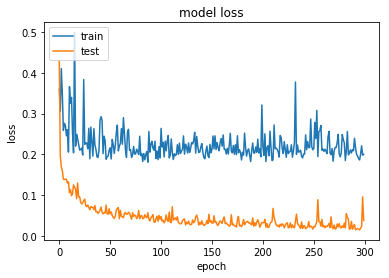

dict_keys(['val_loss', 'loss'])


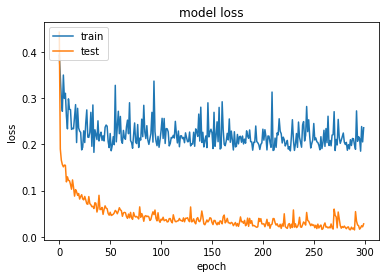

dict_keys(['val_loss', 'loss'])


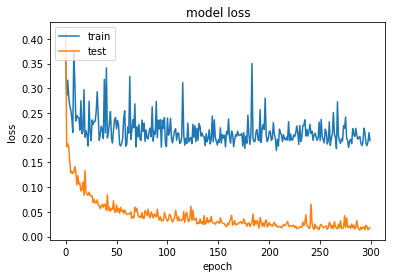

dict_keys(['val_loss', 'loss'])


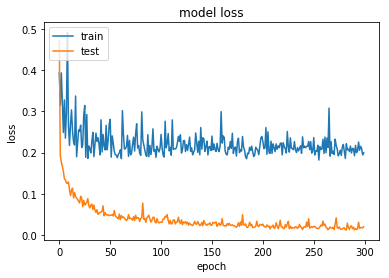

dict_keys(['val_loss', 'loss'])


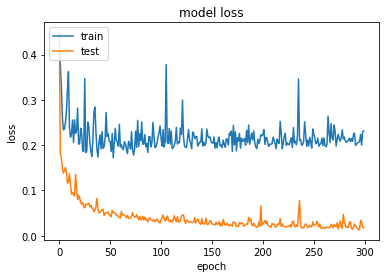

dict_keys(['val_loss', 'loss'])


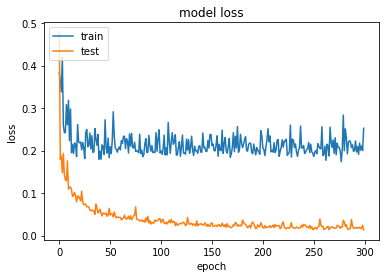

dict_keys(['val_loss', 'loss'])


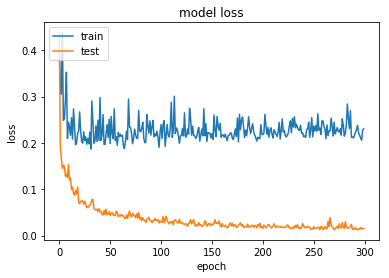

dict_keys(['val_loss', 'loss'])


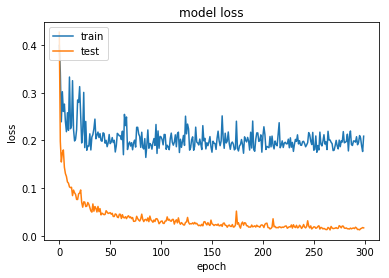

dict_keys(['val_loss', 'loss'])


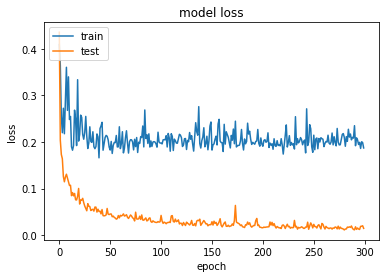

dict_keys(['val_loss', 'loss'])


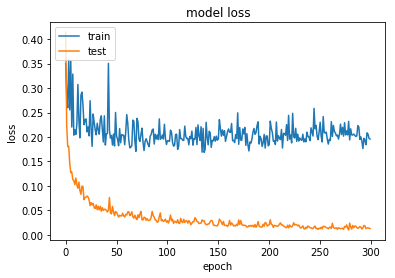

dict_keys(['val_loss', 'loss'])


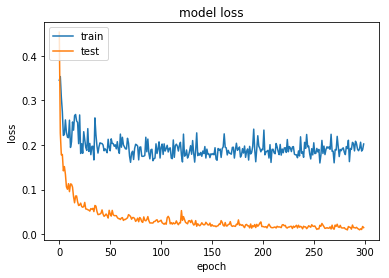

dict_keys(['val_loss', 'loss'])


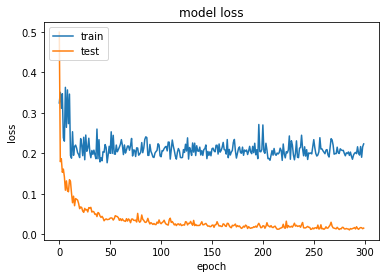

dict_keys(['val_loss', 'loss'])


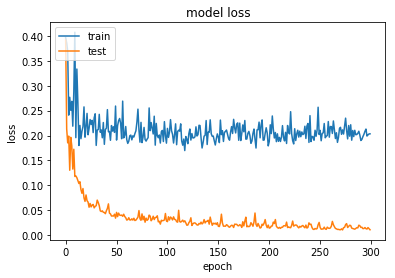

dict_keys(['val_loss', 'loss'])


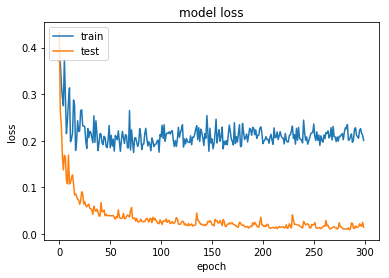

dict_keys(['val_loss', 'loss'])


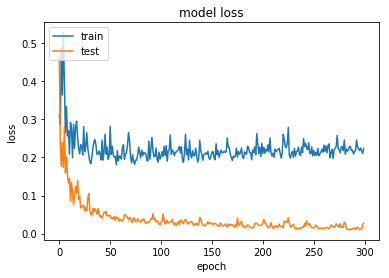

dict_keys(['val_loss', 'loss'])


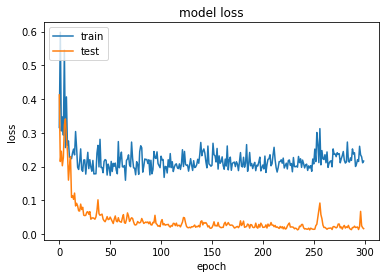

dict_keys(['val_loss', 'loss'])


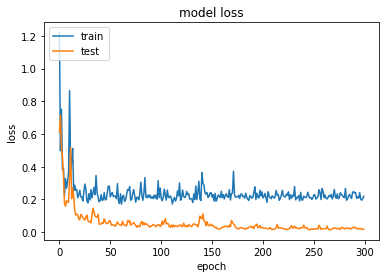

dict_keys(['val_loss', 'loss'])


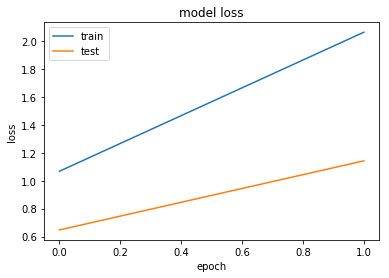

dict_keys(['val_loss', 'loss'])


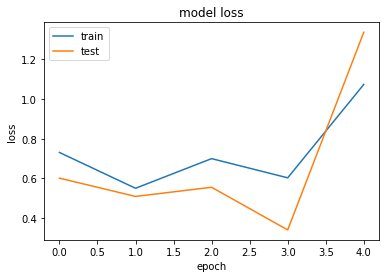

dict_keys(['val_loss', 'loss'])


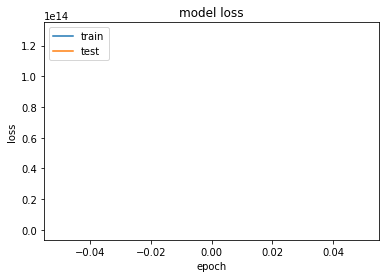

dict_keys(['val_loss', 'loss'])


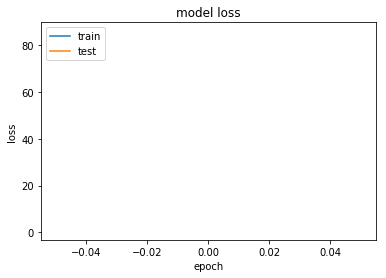

In [15]:
for x in momentum:
    model = Sequential()
    model.add(Dense(200, input_dim=X_train_scaled.shape[1], init='uniform'))
    model.add(Activation('relu'))

    model.add(Dense(1, init='uniform'))
    model.add(Activation('linear'))

    sgd = SGD(lr=0.2,momentum=x)
    model.compile(optimizer=sgd,loss='mean_squared_error')

    hist = model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), nb_epoch=300,
    verbose=0, validation_data=(X_test_scaled.as_matrix(), y_test_scaled.as_matrix()))
    print(hist.history.keys())
    plt.plot(hist.history['val_loss'])
    plt.plot(hist.history['loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

<p>Nuevamente al trabajar con sigmoidal no se obtienen resultados. Para el caso de relu valores muy altos de momentum hacen diverger el modelo</p>

<h4>Pregunta I</h4>
<p>Entrene los modelos considerados en c) y d) utilizando SGD en mini-batches. Experimente con diferentes
tamaños del batch. Comente.</p>

<h6>Para sigmoidal</h6>

[   1.   20.   39.   58.   77.   96.  114.  133.  152.  171.  190.  209.
  228.  247.  266.  284.  303.  322.  341.  360.  379.]
1.0


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(200, kernel_initializer="uniform", input_dim=13)`
  import sys
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.5/dist-packages/keras/models.py:834: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


dict_keys(['val_loss', 'loss'])


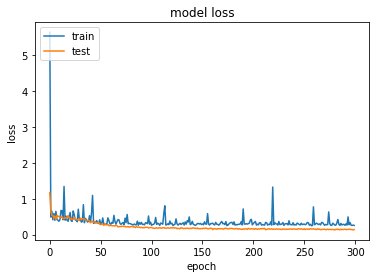

20.0
dict_keys(['val_loss', 'loss'])


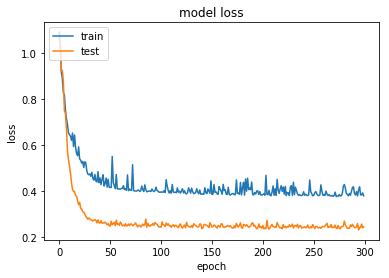

39.0
dict_keys(['val_loss', 'loss'])


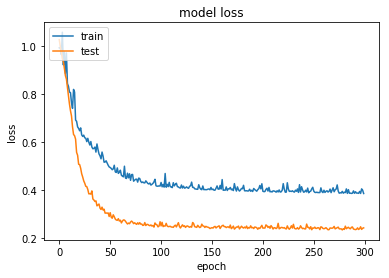

58.0
dict_keys(['val_loss', 'loss'])


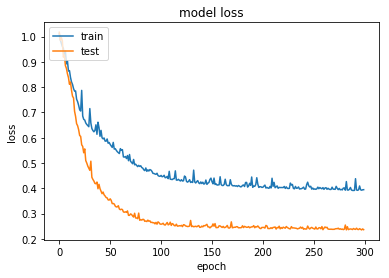

77.0
dict_keys(['val_loss', 'loss'])


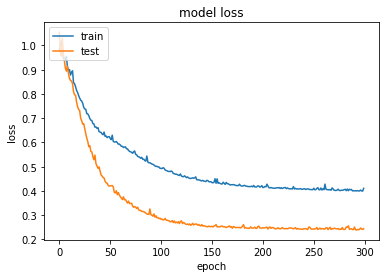

96.0
dict_keys(['val_loss', 'loss'])


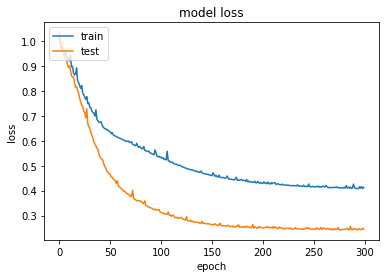

114.0
dict_keys(['val_loss', 'loss'])


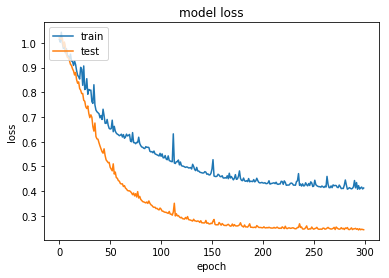

133.0
dict_keys(['val_loss', 'loss'])


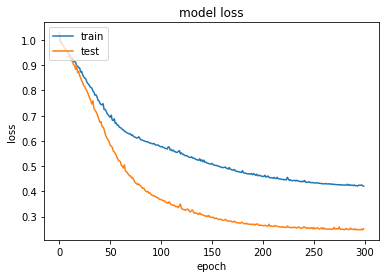

152.0
dict_keys(['val_loss', 'loss'])


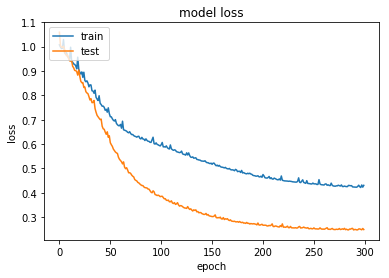

171.0
dict_keys(['val_loss', 'loss'])


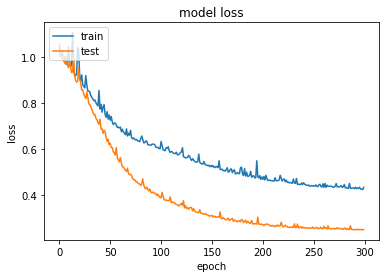

190.0
dict_keys(['val_loss', 'loss'])


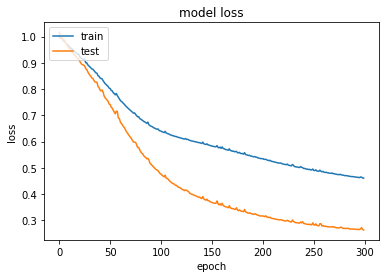

209.0
dict_keys(['val_loss', 'loss'])


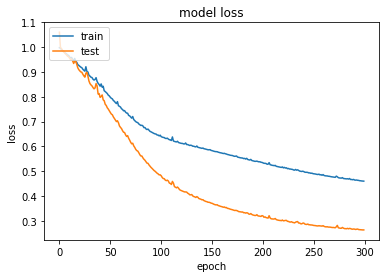

228.0
dict_keys(['val_loss', 'loss'])


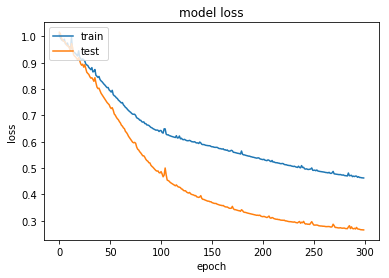

247.0
dict_keys(['val_loss', 'loss'])


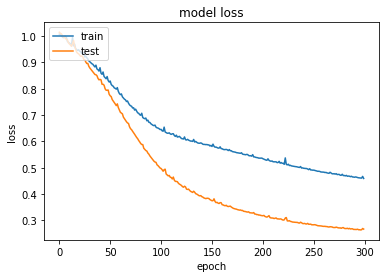

266.0
dict_keys(['val_loss', 'loss'])


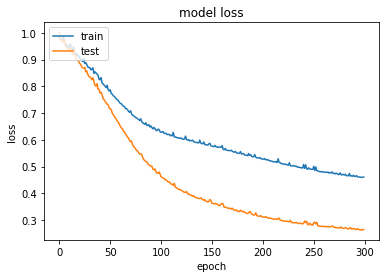

284.0
dict_keys(['val_loss', 'loss'])


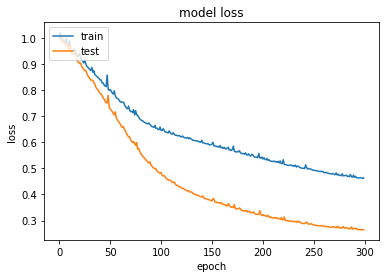

303.0
dict_keys(['val_loss', 'loss'])


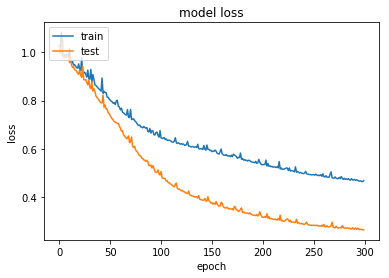

322.0
dict_keys(['val_loss', 'loss'])


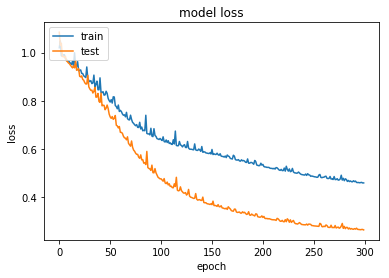

341.0
dict_keys(['val_loss', 'loss'])


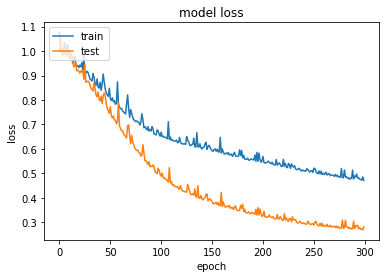

360.0
dict_keys(['val_loss', 'loss'])


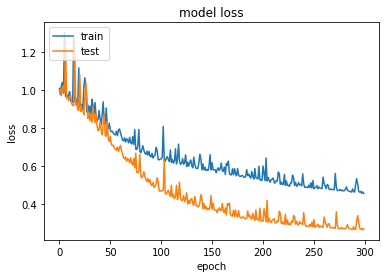

379.0
dict_keys(['val_loss', 'loss'])


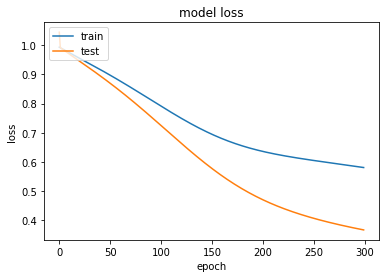

In [16]:
n_batches = 21
batch_sizes = np.round(np.linspace(1,X_train_scaled.shape[0],n_batches))
print(batch_sizes)
for z in batch_sizes:
    print(z)
    model = Sequential()
    model.add(Dense(200, input_dim=X_train_scaled.shape[1], init='uniform'))
    model.add(Activation('sigmoid'))

    model.add(Dense(1, init='uniform'))
    model.add(Activation('linear'))

    sgd = SGD(lr=0.01)
    model.compile(optimizer=sgd,loss='mean_squared_error')
    hist = model.fit(X_train_scaled.as_matrix(),y_train_scaled.as_matrix(),batch_size=int(z),nb_epoch=300, verbose=0,validation_data=(X_test_scaled.as_matrix(), y_test_scaled.as_matrix()))

    print(hist.history.keys())
    plt.plot(hist.history['val_loss'])
    plt.plot(hist.history['loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()   



<p>Con un batch no se obtienen buenos resultados, pero al usar batchs de 20 se empiezan a tener buenos resultados, al ir aumentando mucho el tamaño por batch, la convergencia es mucho más lenta.</p>

<h6>Para función Relu</h6>

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(200, kernel_initializer="uniform", input_dim=13)`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="uniform")`
  
/usr/local/lib/python3.5/dist-packages/keras/models.py:834: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


dict_keys(['val_loss', 'loss'])


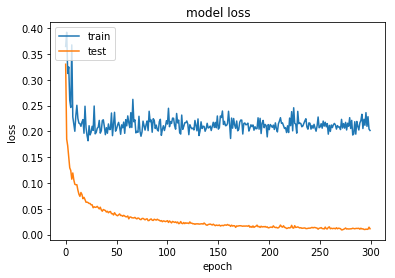

dict_keys(['val_loss', 'loss'])


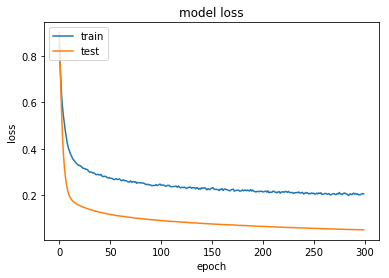

dict_keys(['val_loss', 'loss'])


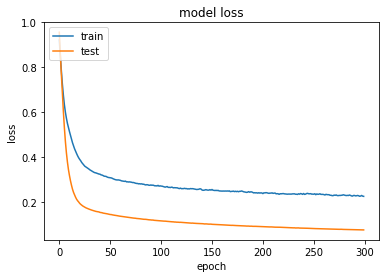

dict_keys(['val_loss', 'loss'])


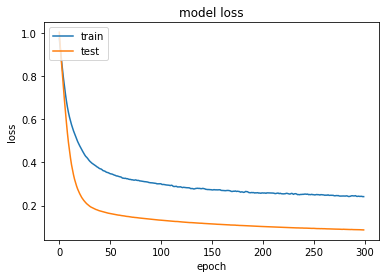

dict_keys(['val_loss', 'loss'])


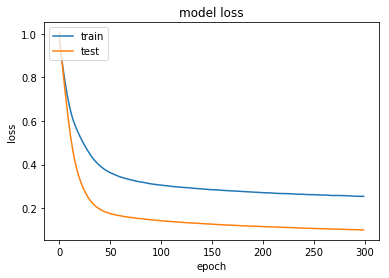

dict_keys(['val_loss', 'loss'])


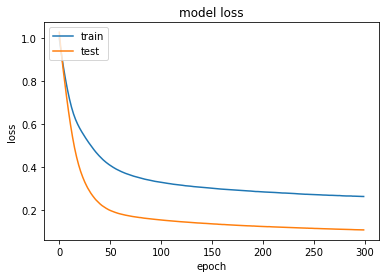

dict_keys(['val_loss', 'loss'])


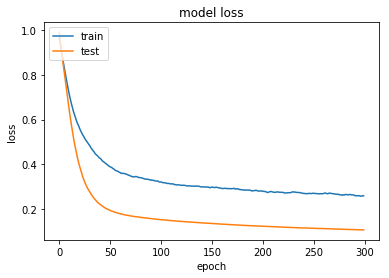

dict_keys(['val_loss', 'loss'])


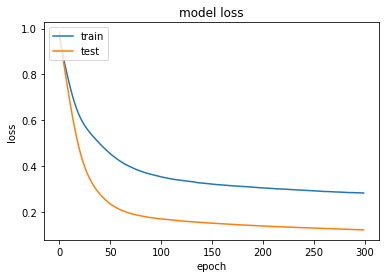

dict_keys(['val_loss', 'loss'])


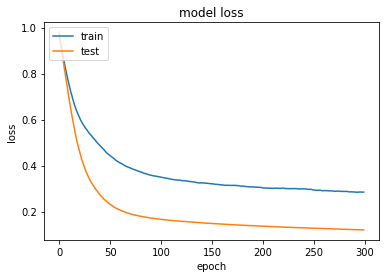

dict_keys(['val_loss', 'loss'])


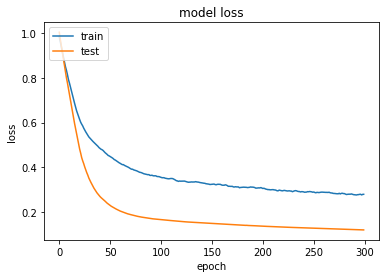

dict_keys(['val_loss', 'loss'])


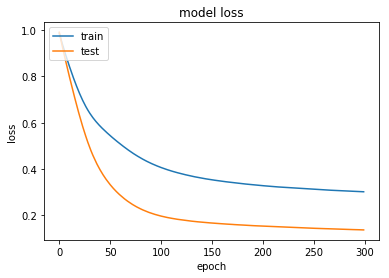

dict_keys(['val_loss', 'loss'])


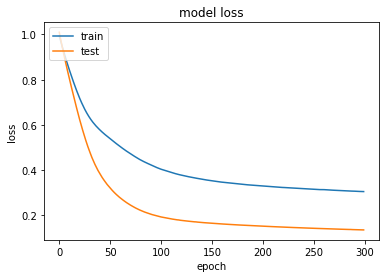

dict_keys(['val_loss', 'loss'])


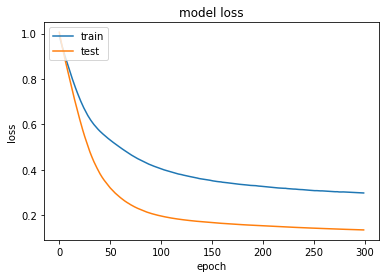

dict_keys(['val_loss', 'loss'])


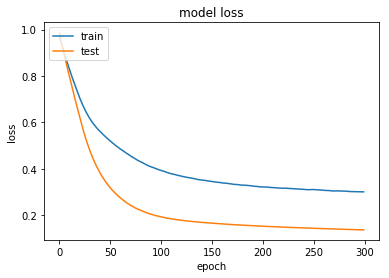

dict_keys(['val_loss', 'loss'])


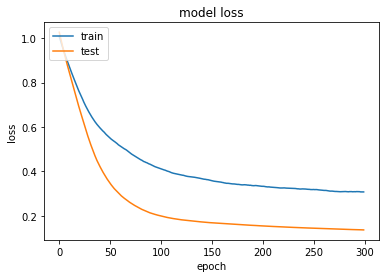

dict_keys(['val_loss', 'loss'])


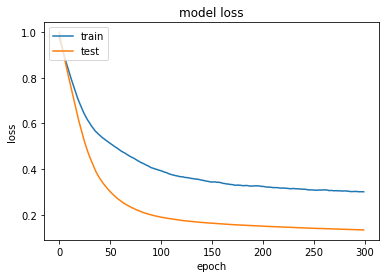

dict_keys(['val_loss', 'loss'])


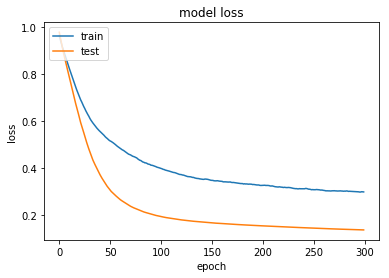

dict_keys(['val_loss', 'loss'])


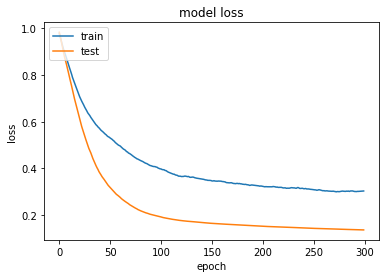

dict_keys(['val_loss', 'loss'])


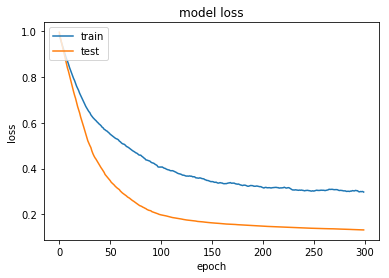

dict_keys(['val_loss', 'loss'])


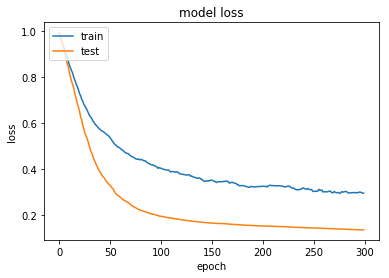

dict_keys(['val_loss', 'loss'])


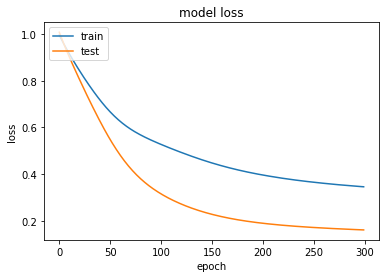

In [17]:
for z in batch_sizes:
    model = Sequential()
    model.add(Dense(200, input_dim=X_train_scaled.shape[1], init='uniform'))
    model.add(Activation('relu'))

    model.add(Dense(1, init='uniform'))
    model.add(Activation('linear'))

    sgd = SGD(lr=0.01)
    model.compile(optimizer=sgd,loss='mean_squared_error')

    hist = model.fit(X_train_scaled.as_matrix(),y_train_scaled.as_matrix(),batch_size=int(z),nb_epoch=300, verbose=0,validation_data=(X_test_scaled.as_matrix(), y_test_scaled.as_matrix()))
    print(hist.history.keys())
    plt.plot(hist.history['val_loss'])
    plt.plot(hist.history['loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

<p>Con relu, al utilizar un batch de tamaño 1, sí existe convergencia, al igual que en el caso anterior, si se aumenta el tamaño del batch, disminuye la velocidad de convergencia.</p>

<h4> Pregunta J <h4/>
<p>Entrene los modelos obtenidos en c) y d) utilizando estrategias modernas para adaptar la tasa de
aprendizaje. Compare los desempeños de adagrad, adadelta, RMS prop y adam. ¿Se observa en alg´un
caso un mejor resultado final? ¿Se observa en alg´un caso una mayor velocidad de convergencia sobre
el dataset de entrenamiento? ¿Sobre el dataset de pruebas?</p>
<h5> Utilizando Adagrad como optimizador </h5>

Epoch 1/10
379/379 [==============================] - 0s - loss: 0.1628     
Epoch 2/10
379/379 [==============================] - 0s - loss: 0.1602     
Epoch 3/10
379/379 [==============================] - 0s - loss: 0.1587     
Epoch 4/10
379/379 [==============================] - 0s - loss: 0.1570     
Epoch 5/10
379/379 [==============================] - 0s - loss: 0.1550     
Epoch 6/10
379/379 [==============================] - 0s - loss: 0.1543     
Epoch 7/10
379/379 [==============================] - 0s - loss: 0.1522     
Epoch 8/10
379/379 [==============================] - 0s - loss: 0.1514     
Epoch 9/10
379/379 [==============================] - 0s - loss: 0.1493     
Epoch 10/10
379/379 [==============================] - 0s - loss: 0.1481     


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(200, kernel_initializer="uniform", input_dim=13)`
  import sys
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.5/dist-packages/keras/models.py:834: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


dict_keys(['val_loss', 'loss'])


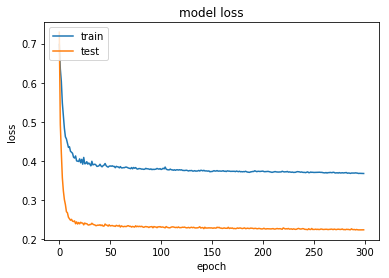

In [18]:
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta

model.fit(X_train_scaled.as_matrix(),y_train_scaled.as_matrix())


model = Sequential()
model.add(Dense(200, input_dim=X_train_scaled.shape[1], init='uniform'))
model.add(Activation('sigmoid'))

model.add(Dense(1, init='uniform'))
model.add(Activation('linear'))

moptimizer = Adagrad(lr=0.01)
model.compile(optimizer=moptimizer,loss='mean_squared_error')

hist = model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), nb_epoch=300,
verbose=0, validation_data=(X_test_scaled.as_matrix(), y_test_scaled.as_matrix()))
print(hist.history.keys())
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

<h6> Utilizando Adadelta </h6>

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(200, kernel_initializer="uniform", input_dim=13)`
  """
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="uniform")`
  
/usr/local/lib/python3.5/dist-packages/keras/models.py:834: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


dict_keys(['val_loss', 'loss'])


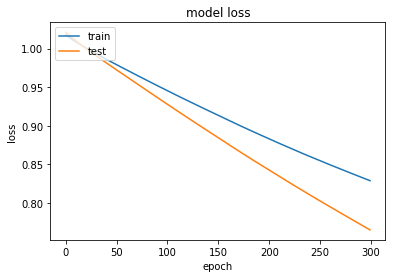

In [19]:



model = Sequential()
model.add(Dense(200, input_dim=X_train_scaled.shape[1], init='uniform'))
model.add(Activation('sigmoid'))

model.add(Dense(1, init='uniform'))
model.add(Activation('linear'))

moptimizer = Adadelta(lr=0.01)
model.compile(optimizer=moptimizer,loss='mean_squared_error')

hist = model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), nb_epoch=300,
verbose=0, validation_data=(X_test_scaled.as_matrix(), y_test_scaled.as_matrix()))
print(hist.history.keys())
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

<h6>Usando RMSprop</h6>

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(200, kernel_initializer="uniform", input_dim=13)`
  """
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="uniform")`
  
/usr/local/lib/python3.5/dist-packages/keras/models.py:834: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


dict_keys(['val_loss', 'loss'])


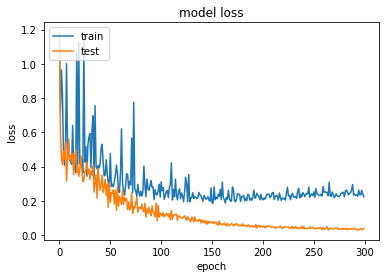

In [20]:



model = Sequential()
model.add(Dense(200, input_dim=X_train_scaled.shape[1], init='uniform'))
model.add(Activation('sigmoid'))

model.add(Dense(1, init='uniform'))
model.add(Activation('linear'))

moptimizer = RMSprop(lr=0.01)
model.compile(optimizer=moptimizer,loss='mean_squared_error')

hist = model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), nb_epoch=300,
verbose=0, validation_data=(X_test_scaled.as_matrix(), y_test_scaled.as_matrix()))
print(hist.history.keys())
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

<h6>Usando Adam</h6>

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(200, kernel_initializer="uniform", input_dim=13)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="uniform")`
  import sys
/usr/local/lib/python3.5/dist-packages/keras/models.py:834: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


dict_keys(['val_loss', 'loss'])


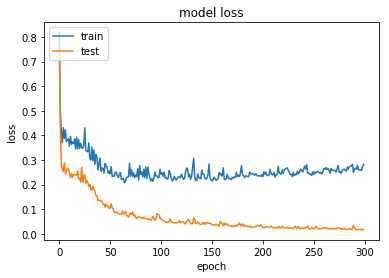

In [21]:


model = Sequential()
model.add(Dense(200, input_dim=X_train_scaled.shape[1], init='uniform'))
model.add(Activation('sigmoid'))

model.add(Dense(1, init='uniform'))
model.add(Activation('linear'))

moptimizer = Adam(lr=0.01)
model.compile(optimizer=moptimizer,loss='mean_squared_error')

hist = model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), nb_epoch=300,
verbose=0, validation_data=(X_test_scaled.as_matrix(), y_test_scaled.as_matrix()))
print(hist.history.keys())
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

<h6>Al comparar todos en un mismo gráfico</h6>

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(200, kernel_initializer="uniform", input_dim=13)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="uniform")`
  import sys
/usr/local/lib/python3.5/dist-packages/keras/models.py:834: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


dict_keys(['val_loss', 'loss'])


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:28: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(200, kernel_initializer="uniform", input_dim=13)`
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:31: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="uniform")`


dict_keys(['val_loss', 'loss'])


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:52: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(200, kernel_initializer="uniform", input_dim=13)`
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:55: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="uniform")`


dict_keys(['val_loss', 'loss'])


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:73: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(200, kernel_initializer="uniform", input_dim=13)`
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:76: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="uniform")`


dict_keys(['val_loss', 'loss'])


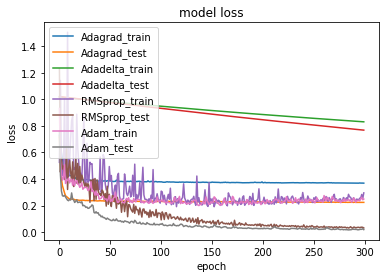

In [22]:


model = Sequential()
model.add(Dense(200, input_dim=X_train_scaled.shape[1], init='uniform'))
model.add(Activation('sigmoid'))

model.add(Dense(1, init='uniform'))
model.add(Activation('linear'))

moptimizer = Adagrad(lr=0.01)
model.compile(optimizer=moptimizer,loss='mean_squared_error')

hist = model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), nb_epoch=300,
verbose=0, validation_data=(X_test_scaled.as_matrix(), y_test_scaled.as_matrix()))
print(hist.history.keys())
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')






model = Sequential()
model.add(Dense(200, input_dim=X_train_scaled.shape[1], init='uniform'))
model.add(Activation('sigmoid'))

model.add(Dense(1, init='uniform'))
model.add(Activation('linear'))

moptimizer = Adadelta(lr=0.01)
model.compile(optimizer=moptimizer,loss='mean_squared_error')

hist = model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), nb_epoch=300,
verbose=0, validation_data=(X_test_scaled.as_matrix(), y_test_scaled.as_matrix()))
print(hist.history.keys())
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')






model = Sequential()
model.add(Dense(200, input_dim=X_train_scaled.shape[1], init='uniform'))
model.add(Activation('sigmoid'))

model.add(Dense(1, init='uniform'))
model.add(Activation('linear'))

moptimizer = RMSprop(lr=0.01)
model.compile(optimizer=moptimizer,loss='mean_squared_error')

hist = model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), nb_epoch=300,
verbose=0, validation_data=(X_test_scaled.as_matrix(), y_test_scaled.as_matrix()))
print(hist.history.keys())
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')



model = Sequential()
model.add(Dense(200, input_dim=X_train_scaled.shape[1], init='uniform'))
model.add(Activation('sigmoid'))

model.add(Dense(1, init='uniform'))
model.add(Activation('linear'))

moptimizer = Adam(lr=0.01)
model.compile(optimizer=moptimizer,loss='mean_squared_error')

hist = model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), nb_epoch=300,
verbose=0, validation_data=(X_test_scaled.as_matrix(), y_test_scaled.as_matrix()))
print(hist.history.keys())
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Adagrad_train', 'Adagrad_test', 'Adadelta_train', 'Adadelta_test', 'RMSprop_train', 'RMSprop_test', 'Adam_train', 'Adam_test'], loc='upper left')



plt.show()

<p>Se observa que los mejores resultados son RMSprop y Adam cuando la función de activación es sigmoidal.</p>

<h6>Gráficos para función relu</h6>

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(200, kernel_initializer="uniform", input_dim=13)`
  """
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="uniform")`
  
/usr/local/lib/python3.5/dist-packages/keras/models.py:834: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


dict_keys(['val_loss', 'loss'])


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:29: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(200, kernel_initializer="uniform", input_dim=13)`
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:32: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="uniform")`


dict_keys(['val_loss', 'loss'])


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:53: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(200, kernel_initializer="uniform", input_dim=13)`
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:56: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="uniform")`


dict_keys(['val_loss', 'loss'])


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:74: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(200, kernel_initializer="uniform", input_dim=13)`
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:77: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="uniform")`


dict_keys(['val_loss', 'loss'])


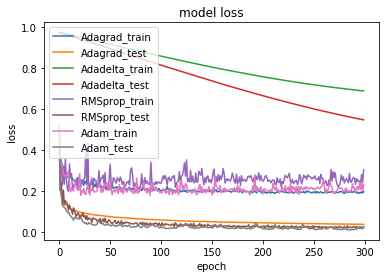

In [23]:
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta


model = Sequential()
model.add(Dense(200, input_dim=X_train_scaled.shape[1], init='uniform'))
model.add(Activation('relu'))

model.add(Dense(1, init='uniform'))
model.add(Activation('linear'))

moptimizer = Adagrad(lr=0.01)
model.compile(optimizer=moptimizer,loss='mean_squared_error')

hist = model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), nb_epoch=300,
verbose=0, validation_data=(X_test_scaled.as_matrix(), y_test_scaled.as_matrix()))
print(hist.history.keys())
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')






model = Sequential()
model.add(Dense(200, input_dim=X_train_scaled.shape[1], init='uniform'))
model.add(Activation('relu'))

model.add(Dense(1, init='uniform'))
model.add(Activation('linear'))

moptimizer = Adadelta(lr=0.01)
model.compile(optimizer=moptimizer,loss='mean_squared_error')

hist = model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), nb_epoch=300,
verbose=0, validation_data=(X_test_scaled.as_matrix(), y_test_scaled.as_matrix()))
print(hist.history.keys())
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')






model = Sequential()
model.add(Dense(200, input_dim=X_train_scaled.shape[1], init='uniform'))
model.add(Activation('relu'))

model.add(Dense(1, init='uniform'))
model.add(Activation('linear'))

moptimizer = RMSprop(lr=0.01)
model.compile(optimizer=moptimizer,loss='mean_squared_error')

hist = model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), nb_epoch=300,
verbose=0, validation_data=(X_test_scaled.as_matrix(), y_test_scaled.as_matrix()))
print(hist.history.keys())
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')



model = Sequential()
model.add(Dense(200, input_dim=X_train_scaled.shape[1], init='uniform'))
model.add(Activation('relu'))

model.add(Dense(1, init='uniform'))
model.add(Activation('linear'))

moptimizer = Adam(lr=0.01)
model.compile(optimizer=moptimizer,loss='mean_squared_error')

hist = model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), nb_epoch=300,
verbose=0, validation_data=(X_test_scaled.as_matrix(), y_test_scaled.as_matrix()))
print(hist.history.keys())
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Adagrad_train', 'Adagrad_test', 'Adadelta_train', 'Adadelta_test', 'RMSprop_train', 'RMSprop_test', 'Adam_train', 'Adam_test'], loc='upper left')



plt.show()

<p>En el caso de relu, RMSprop y Adam también son las que obtiene de los mejores resultados, pero además, Adagrad ofrece buenos resultados, a diferencia de lo ocurrido con la función de activación sigmoidal.</p>

<h4>Pregunta K</h4>
<p>Entrene los modelos obtenidos en c) y d) utilizando regularizadores l1 y l2 (weight decay). Compare
los desempeños de prueba obtenidos antes y después de regularizar. Experimente con distintos
valores del parámetro de regularización y comente. Luego, agregue una capa al modelo y aumente
significativamente el número de neuronas escondidas en cada capa. Evalúe nuvamente el efecto de los
regularizadores.</p>

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(200, kernel_initializer="uniform", input_dim=13)`
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="uniform")`
  if __name__ == '__main__':
/usr/local/lib/python3.5/dist-packages/keras/models.py:834: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


dict_keys(['val_loss', 'loss'])


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:26: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(200, kernel_initializer="uniform", input_dim=13, kernel_regularizer=<keras.reg...)`
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:29: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="uniform", kernel_regularizer=<keras.reg...)`


dict_keys(['val_loss', 'loss'])


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:45: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(200, kernel_initializer="uniform", input_dim=13, kernel_regularizer=<keras.reg...)`
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:48: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="uniform", kernel_regularizer=<keras.reg...)`


dict_keys(['val_loss', 'loss'])


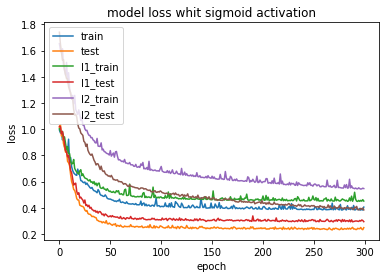

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:71: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(200, kernel_initializer="uniform", input_dim=13)`
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:74: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="uniform")`


dict_keys(['val_loss', 'loss'])


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:91: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(200, kernel_initializer="uniform", input_dim=13, kernel_regularizer=<keras.reg...)`
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:94: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="uniform", kernel_regularizer=<keras.reg...)`


dict_keys(['val_loss', 'loss'])


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:110: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(200, kernel_initializer="uniform", input_dim=13, kernel_regularizer=<keras.reg...)`
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:113: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="uniform", kernel_regularizer=<keras.reg...)`


dict_keys(['val_loss', 'loss'])


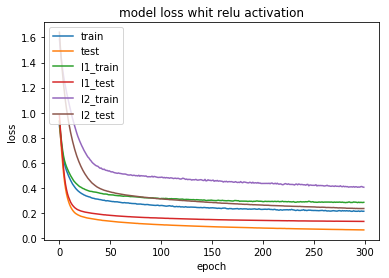

In [36]:
from keras import regularizers



model = Sequential()
model.add(Dense(200, input_dim=X_train_scaled.shape[1], init='uniform'))
model.add(Activation('sigmoid'))

model.add(Dense(1, init='uniform'))
model.add(Activation('linear'))

sgd = SGD(lr=0.01)
model.compile(optimizer=sgd,loss='mean_squared_error')

hist = model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), nb_epoch=300,
verbose=0, validation_data=(X_test_scaled.as_matrix(), y_test_scaled.as_matrix()))
print(hist.history.keys())
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['loss'])



model = Sequential()
#la regularization se debe incorporar a cada capa separadamente
idim=X_train_scaled.shape[1]
model.add(Dense(200,input_dim=idim,init='uniform',W_regularizer=regularizers.l2(0.01)))
model.add(Activation('sigmoid'))

model.add(Dense(1, init='uniform',W_regularizer=regularizers.l2(0.01)))
model.add(Activation('linear'))

sgd = SGD(lr=0.01)
model.compile(optimizer=sgd,loss='mean_squared_error')

hist = model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), nb_epoch=300,
verbose=0, validation_data=(X_test_scaled.as_matrix(), y_test_scaled.as_matrix()))
print(hist.history.keys())
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['loss'])


model = Sequential()
#la regularization se debe incorporar a cada capa separadamente
idim=X_train_scaled.shape[1]
model.add(Dense(200,input_dim=idim,init='uniform',W_regularizer=regularizers.l1(0.01)))
model.add(Activation('sigmoid'))

model.add(Dense(1, init='uniform',W_regularizer=regularizers.l1(0.01)))
model.add(Activation('linear'))

sgd = SGD(lr=0.01)
model.compile(optimizer=sgd,loss='mean_squared_error')

hist = model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), nb_epoch=300,
verbose=0, validation_data=(X_test_scaled.as_matrix(), y_test_scaled.as_matrix()))
print(hist.history.keys())
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['loss'])



plt.title('model loss whit sigmoid activation')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test' , 'l1_train', 'l1_test', 'l2_train', 'l2_test'], loc='upper left')
plt.show()



model = Sequential()
model.add(Dense(200, input_dim=X_train_scaled.shape[1], init='uniform'))
model.add(Activation('relu'))

model.add(Dense(1, init='uniform'))
model.add(Activation('linear'))

sgd = SGD(lr=0.01)
model.compile(optimizer=sgd,loss='mean_squared_error')

hist = model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), nb_epoch=300,
verbose=0, validation_data=(X_test_scaled.as_matrix(), y_test_scaled.as_matrix()))
print(hist.history.keys())
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['loss'])



model = Sequential()
#la regularization se debe incorporar a cada capa separadamente
idim=X_train_scaled.shape[1]
model.add(Dense(200,input_dim=idim,init='uniform',W_regularizer=regularizers.l2(0.01)))
model.add(Activation('relu'))

model.add(Dense(1, init='uniform',W_regularizer=regularizers.l2(0.01)))
model.add(Activation('linear'))

sgd = SGD(lr=0.01)
model.compile(optimizer=sgd,loss='mean_squared_error')

hist = model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), nb_epoch=300,
verbose=0, validation_data=(X_test_scaled.as_matrix(), y_test_scaled.as_matrix()))
print(hist.history.keys())
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['loss'])


model = Sequential()
#la regularization se debe incorporar a cada capa separadamente
idim=X_train_scaled.shape[1]
model.add(Dense(200,input_dim=idim,init='uniform',W_regularizer=regularizers.l1(0.01)))
model.add(Activation('relu'))

model.add(Dense(1, init='uniform',W_regularizer=regularizers.l1(0.01)))
model.add(Activation('linear'))

sgd = SGD(lr=0.01)
model.compile(optimizer=sgd,loss='mean_squared_error')

hist = model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), nb_epoch=300,
verbose=0, validation_data=(X_test_scaled.as_matrix(), y_test_scaled.as_matrix()))
print(hist.history.keys())
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['loss'])



plt.title('model loss whit relu activation')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test', 'l1_train', 'l1_test', 'l2_train', 'l2_test'], loc='upper left')
plt.show()

<p>La regularización arroja peores resultados tanto con l1 y l2 para ambas funciones de activación. Y menor veloicdad de convergencia.<p>

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(400, kernel_initializer="uniform", input_dim=13)`
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(400, kernel_initializer="uniform")`
  """
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="uniform")`
  
/usr/local/lib/python3.5/dist-packages/keras/models.py:834: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


dict_keys(['val_loss', 'loss'])


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:25: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(400, kernel_initializer="uniform", input_dim=13, kernel_regularizer=<keras.reg...)`
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:28: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(400, kernel_initializer="uniform")`
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:31: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="uniform", kernel_regularizer=<keras.reg...)`


dict_keys(['val_loss', 'loss'])


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:47: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(400, kernel_initializer="uniform", input_dim=13, kernel_regularizer=<keras.reg...)`
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:50: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(400, kernel_initializer="uniform")`
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:53: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="uniform", kernel_regularizer=<keras.reg...)`


dict_keys(['val_loss', 'loss'])


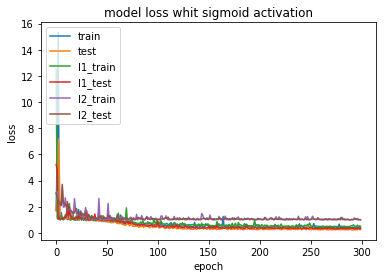

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:76: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(400, kernel_initializer="uniform", input_dim=13)`
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:79: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(400, kernel_initializer="uniform")`
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:83: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="uniform")`


dict_keys(['val_loss', 'loss'])


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:100: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(400, kernel_initializer="uniform", input_dim=13, kernel_regularizer=<keras.reg...)`
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:103: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(400, kernel_initializer="uniform")`
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:106: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="uniform", kernel_regularizer=<keras.reg...)`


dict_keys(['val_loss', 'loss'])


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:122: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(400, kernel_initializer="uniform", input_dim=13, kernel_regularizer=<keras.reg...)`
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:125: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(400, kernel_initializer="uniform")`
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:128: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="uniform", kernel_regularizer=<keras.reg...)`


dict_keys(['val_loss', 'loss'])


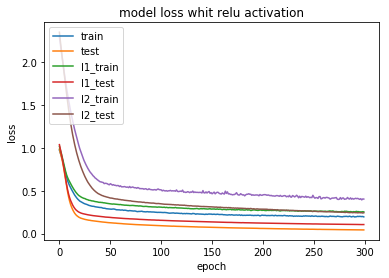

In [39]:
model = Sequential()
model.add(Dense(400, input_dim=X_train_scaled.shape[1], init='uniform'))
model.add(Activation('sigmoid'))

model.add(Dense(400, init='uniform'))
model.add(Activation('sigmoid'))

model.add(Dense(1, init='uniform'))
model.add(Activation('linear'))

sgd = SGD(lr=0.01)
model.compile(optimizer=sgd,loss='mean_squared_error')

hist = model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), nb_epoch=300,
verbose=0, validation_data=(X_test_scaled.as_matrix(), y_test_scaled.as_matrix()))
print(hist.history.keys())
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['loss'])



model = Sequential()
#la regularization se debe incorporar a cada capa separadamente
idim=X_train_scaled.shape[1]
model.add(Dense(400,input_dim=idim,init='uniform',W_regularizer=regularizers.l2(0.01)))
model.add(Activation('sigmoid'))

model.add(Dense(400, init='uniform'))
model.add(Activation('sigmoid'))

model.add(Dense(1, init='uniform',W_regularizer=regularizers.l2(0.01)))
model.add(Activation('linear'))

sgd = SGD(lr=0.01)
model.compile(optimizer=sgd,loss='mean_squared_error')

hist = model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), nb_epoch=300,
verbose=0, validation_data=(X_test_scaled.as_matrix(), y_test_scaled.as_matrix()))
print(hist.history.keys())
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['loss'])


model = Sequential()
#la regularization se debe incorporar a cada capa separadamente
idim=X_train_scaled.shape[1]
model.add(Dense(400,input_dim=idim,init='uniform',W_regularizer=regularizers.l1(0.01)))
model.add(Activation('sigmoid'))

model.add(Dense(400, init='uniform'))
model.add(Activation('sigmoid'))

model.add(Dense(1, init='uniform',W_regularizer=regularizers.l1(0.01)))
model.add(Activation('linear'))

sgd = SGD(lr=0.01)
model.compile(optimizer=sgd,loss='mean_squared_error')

hist = model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), nb_epoch=300,
verbose=0, validation_data=(X_test_scaled.as_matrix(), y_test_scaled.as_matrix()))
print(hist.history.keys())
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['loss'])



plt.title('model loss whit sigmoid activation')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test' , 'l1_train', 'l1_test', 'l2_train', 'l2_test'], loc='upper left')
plt.show()



model = Sequential()
model.add(Dense(400, input_dim=X_train_scaled.shape[1], init='uniform'))
model.add(Activation('relu'))

model.add(Dense(400, init='uniform'))
model.add(Activation('relu'))


model.add(Dense(1, init='uniform'))
model.add(Activation('linear'))

sgd = SGD(lr=0.01)
model.compile(optimizer=sgd,loss='mean_squared_error')

hist = model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), nb_epoch=300,
verbose=0, validation_data=(X_test_scaled.as_matrix(), y_test_scaled.as_matrix()))
print(hist.history.keys())
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['loss'])



model = Sequential()
#la regularization se debe incorporar a cada capa separadamente
idim=X_train_scaled.shape[1]
model.add(Dense(400,input_dim=idim,init='uniform',W_regularizer=regularizers.l2(0.01)))
model.add(Activation('relu'))

model.add(Dense(400, init='uniform'))
model.add(Activation('relu'))

model.add(Dense(1, init='uniform',W_regularizer=regularizers.l2(0.01)))
model.add(Activation('linear'))

sgd = SGD(lr=0.01)
model.compile(optimizer=sgd,loss='mean_squared_error')

hist = model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), nb_epoch=300,
verbose=0, validation_data=(X_test_scaled.as_matrix(), y_test_scaled.as_matrix()))
print(hist.history.keys())
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['loss'])


model = Sequential()
#la regularization se debe incorporar a cada capa separadamente
idim=X_train_scaled.shape[1]
model.add(Dense(400,input_dim=idim,init='uniform',W_regularizer=regularizers.l1(0.01)))
model.add(Activation('relu'))

model.add(Dense(400, init='uniform'))
model.add(Activation('relu'))

model.add(Dense(1, init='uniform',W_regularizer=regularizers.l1(0.01)))
model.add(Activation('linear'))

sgd = SGD(lr=0.01)
model.compile(optimizer=sgd,loss='mean_squared_error')

hist = model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), nb_epoch=300,
verbose=0, validation_data=(X_test_scaled.as_matrix(), y_test_scaled.as_matrix()))
print(hist.history.keys())
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['loss'])



plt.title('model loss whit relu activation')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test', 'l1_train', 'l1_test', 'l2_train', 'l2_test'], loc='upper left')
plt.show()

<p>Al agregar más capas y neuronas, se producen problemas con poca cantidad de epochs haciendo más lenta la convergencia. Resultado extraño, pues se espera que a mayor número de capas y neuronas, se obtegan mejores resultados.</p>

<h4>Pregunta L</h4>
<p>Entrene los modelos obtenidos en c) y d) utilizando Dropout. Compare los desempeños de prueba
obtenidos antes y después de regularizar. Experimente con distintos valores del parámetro de regularización
y comente. Luego, agregue una capa al modelo y aumente significativamente el número de
neuronas escondidas en cada capa. Evalúe nuevamente el efecto de la regularización, evaluando también
el efecto de regularizar sólo la capa inicial versus la alternativa de regularizar todas las capas.</p>

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(200, kernel_initializer="uniform", input_dim=13)`
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="uniform")`
  if __name__ == '__main__':
/usr/local/lib/python3.5/dist-packages/keras/models.py:834: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


dict_keys(['val_loss', 'loss'])


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:28: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(200, kernel_initializer="uniform", input_dim=13)`
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:30: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="uniform")`


dict_keys(['val_loss', 'loss'])


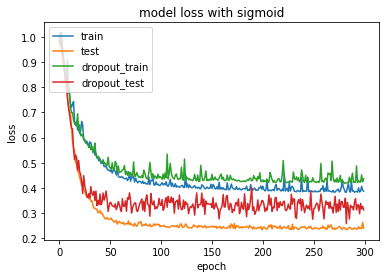

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:54: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(200, kernel_initializer="uniform", input_dim=13)`
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:57: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="uniform")`


dict_keys(['val_loss', 'loss'])


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:76: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(200, kernel_initializer="uniform", input_dim=13)`
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:78: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="uniform")`


dict_keys(['val_loss', 'loss'])


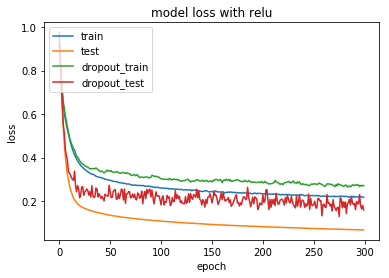

In [25]:
from keras.layers import Dropout



model = Sequential()
model.add(Dense(200, input_dim=X_train_scaled.shape[1], init='uniform'))
model.add(Activation('sigmoid'))

model.add(Dense(1, init='uniform'))
model.add(Activation('linear'))

sgd = SGD(lr=0.01)
model.compile(optimizer=sgd,loss='mean_squared_error')

hist = model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), nb_epoch=300,
verbose=0, validation_data=(X_test_scaled.as_matrix(), y_test_scaled.as_matrix()))
print(hist.history.keys())
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['loss'])




model = Sequential()

idim=X_train_scaled.shape[1]
model.add(Dropout(0.2, input_shape=(idim,)))
model.add(Dense(200,input_dim=idim,init='uniform'))
model.add(Activation('sigmoid'))
model.add(Dense(1, init='uniform'))
model.add(Activation('linear'))

sgd = SGD(lr=0.01)
model.compile(optimizer=sgd,loss='mean_squared_error')

hist = model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), nb_epoch=300,
verbose=0, validation_data=(X_test_scaled.as_matrix(), y_test_scaled.as_matrix()))
print(hist.history.keys())
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['loss'])




plt.title('model loss with sigmoid')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test', 'dropout_train', 'dropout_test'], loc='upper left')
plt.show()



model = Sequential()
model.add(Dense(200, input_dim=X_train_scaled.shape[1], init='uniform'))
model.add(Activation('relu'))

model.add(Dense(1, init='uniform'))
model.add(Activation('linear'))

sgd = SGD(lr=0.01)
model.compile(optimizer=sgd,loss='mean_squared_error')

hist = model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), nb_epoch=300,
verbose=0, validation_data=(X_test_scaled.as_matrix(), y_test_scaled.as_matrix()))
print(hist.history.keys())
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['loss'])




model = Sequential()

idim=X_train_scaled.shape[1]
model.add(Dropout(0.2, input_shape=(idim,)))
model.add(Dense(200,input_dim=idim,init='uniform'))
model.add(Activation('relu'))
model.add(Dense(1, init='uniform'))
model.add(Activation('linear'))

sgd = SGD(lr=0.01)
model.compile(optimizer=sgd,loss='mean_squared_error')

hist = model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), nb_epoch=300,
verbose=0, validation_data=(X_test_scaled.as_matrix(), y_test_scaled.as_matrix()))
print(hist.history.keys())
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['loss'])




plt.title('model loss with relu')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test', 'dropout_train', 'dropout_test'], loc='upper left')
plt.show()

<p> Tanto para relu como para sigmoidal existe una convergencia más lenta al agregar dropout, por lo cual no se recomienda utilizar</p>

<h4>Comparación usando distinto valores para el Dropout con la función sigmoidal</h4>

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(200, kernel_initializer="uniform", input_dim=13)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="uniform")`
  import sys
/usr/local/lib/python3.5/dist-packages/keras/models.py:834: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


dict_keys(['val_loss', 'loss'])
0.001


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:27: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(200, kernel_initializer="uniform", input_dim=13)`
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:29: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="uniform")`


dict_keys(['val_loss', 'loss'])


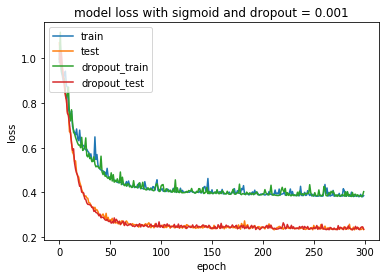

dict_keys(['val_loss', 'loss'])
0.0535789473684
dict_keys(['val_loss', 'loss'])


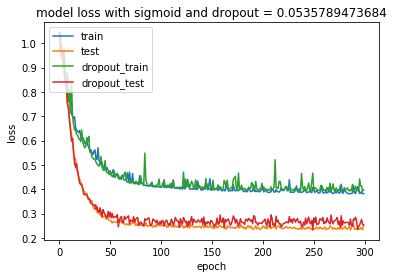

dict_keys(['val_loss', 'loss'])
0.106157894737
dict_keys(['val_loss', 'loss'])


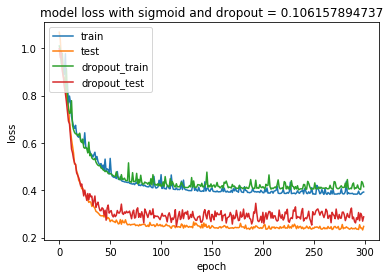

dict_keys(['val_loss', 'loss'])
0.158736842105
dict_keys(['val_loss', 'loss'])


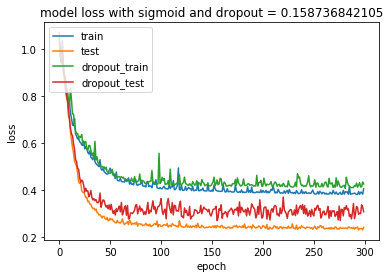

dict_keys(['val_loss', 'loss'])
0.211315789474
dict_keys(['val_loss', 'loss'])


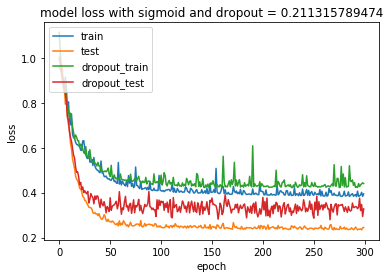

dict_keys(['val_loss', 'loss'])
0.263894736842
dict_keys(['val_loss', 'loss'])


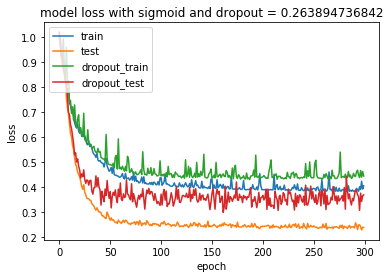

dict_keys(['val_loss', 'loss'])
0.316473684211
dict_keys(['val_loss', 'loss'])


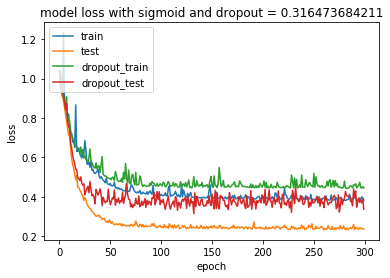

dict_keys(['val_loss', 'loss'])
0.369052631579
dict_keys(['val_loss', 'loss'])


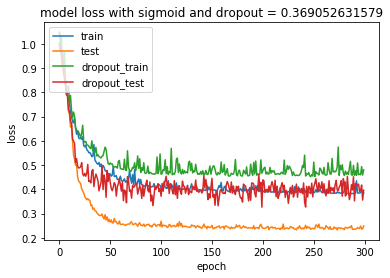

dict_keys(['val_loss', 'loss'])
0.421631578947
dict_keys(['val_loss', 'loss'])


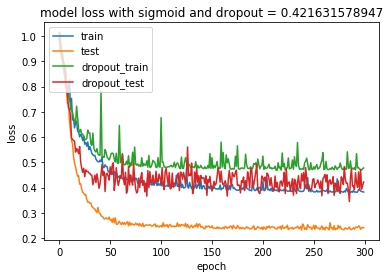

dict_keys(['val_loss', 'loss'])
0.474210526316
dict_keys(['val_loss', 'loss'])


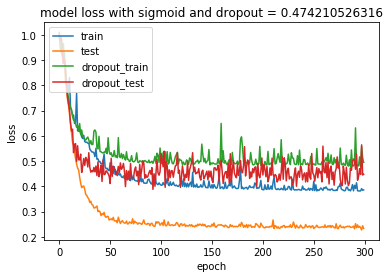

dict_keys(['val_loss', 'loss'])
0.526789473684
dict_keys(['val_loss', 'loss'])


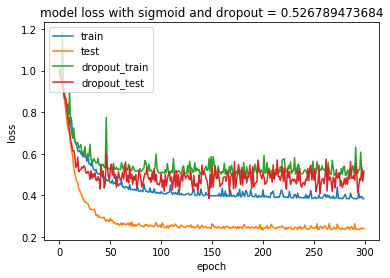

dict_keys(['val_loss', 'loss'])
0.579368421053
dict_keys(['val_loss', 'loss'])


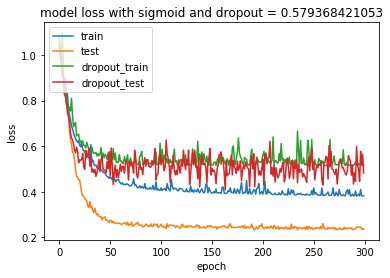

dict_keys(['val_loss', 'loss'])
0.631947368421
dict_keys(['val_loss', 'loss'])


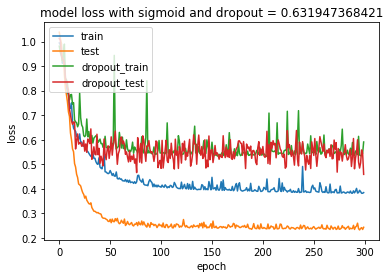

dict_keys(['val_loss', 'loss'])
0.684526315789
dict_keys(['val_loss', 'loss'])


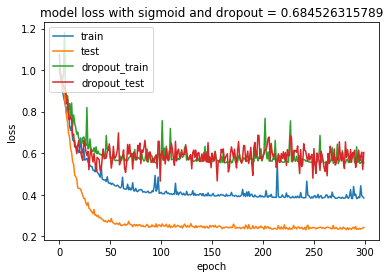

dict_keys(['val_loss', 'loss'])
0.737105263158
dict_keys(['val_loss', 'loss'])


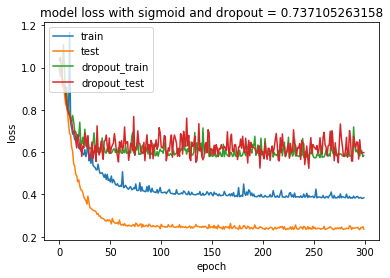

dict_keys(['val_loss', 'loss'])
0.789684210526
dict_keys(['val_loss', 'loss'])


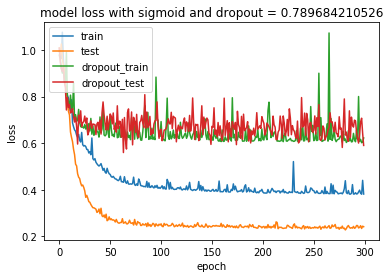

dict_keys(['val_loss', 'loss'])
0.842263157895
dict_keys(['val_loss', 'loss'])


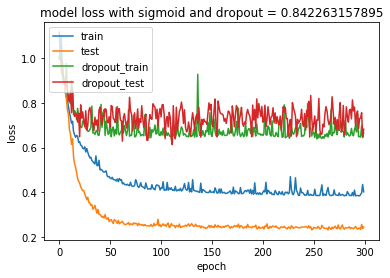

dict_keys(['val_loss', 'loss'])
0.894842105263
dict_keys(['val_loss', 'loss'])


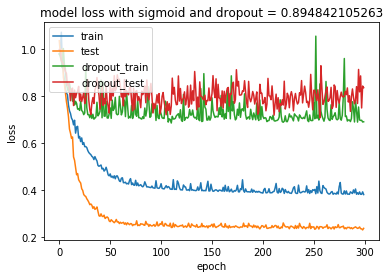

dict_keys(['val_loss', 'loss'])
0.947421052632
dict_keys(['val_loss', 'loss'])


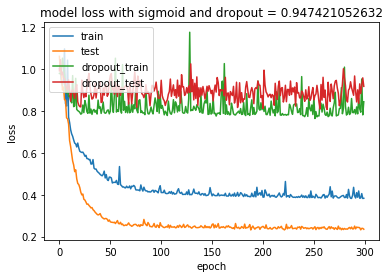

dict_keys(['val_loss', 'loss'])
1.0


/usr/local/lib/python3.5/dist-packages/keras/engine/topology.py:1519: UserWarning: Model inputs must come from a Keras Input layer, they cannot be the output of a previous non-Input layer. Here, a tensor specified as input to "sequential_245_model" was not an Input tensor, it was generated by layer dropout_22.
Note that input tensors are instantiated via `tensor = Input(shape)`.
The tensor that caused the issue was: dropout_22_input:0
  str(x.name))


AttributeError: 'Dropout' object has no attribute 'is_placeholder'

In [26]:
lear_rate = np.linspace(0.001,1,n_lr)
for i in lear_rate:
    model = Sequential()
    model.add(Dense(200, input_dim=X_train_scaled.shape[1], init='uniform'))
    model.add(Activation('sigmoid'))

    model.add(Dense(1, init='uniform'))
    model.add(Activation('linear'))

    sgd = SGD(lr=0.01)
    model.compile(optimizer=sgd,loss='mean_squared_error')

    hist = model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), nb_epoch=300,
    verbose=0, validation_data=(X_test_scaled.as_matrix(), y_test_scaled.as_matrix()))
    print(hist.history.keys())
    plt.plot(hist.history['val_loss'])
    plt.plot(hist.history['loss'])




    model = Sequential()

    idim=X_train_scaled.shape[1]
    print(i)
    model.add(Dropout(i, input_shape=(idim,)))
    model.add(Dense(200,input_dim=idim,init='uniform'))
    model.add(Activation('sigmoid'))
    model.add(Dense(1, init='uniform'))
    model.add(Activation('linear'))

    sgd = SGD(lr=0.01)
    model.compile(optimizer=sgd,loss='mean_squared_error')

    hist = model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), nb_epoch=300,
    verbose=0, validation_data=(X_test_scaled.as_matrix(), y_test_scaled.as_matrix()))
    print(hist.history.keys())
    plt.plot(hist.history['val_loss'])
    plt.plot(hist.history['loss'])




    plt.title('model loss with sigmoid and dropout = '+ str(i))
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test', 'dropout_train' , 'dropout_test'], loc='upper left')
    plt.show()

<p>Al aumentar el valor de dropout, se obtiene una menor convergencia y valores más grandes de error</p>

<h4>Comparación usando distinto valores para el Dropout con la función relu</h4>

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(200, kernel_initializer="uniform", input_dim=13)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="uniform")`
  import sys
/usr/local/lib/python3.5/dist-packages/keras/models.py:834: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


dict_keys(['val_loss', 'loss'])
0.001


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:27: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(200, kernel_initializer="uniform", input_dim=13)`
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:29: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="uniform")`


dict_keys(['val_loss', 'loss'])


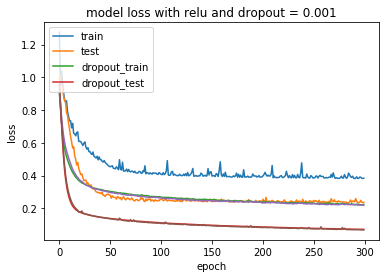

dict_keys(['val_loss', 'loss'])
0.409142857143
dict_keys(['val_loss', 'loss'])


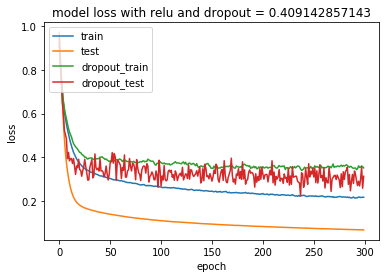

dict_keys(['val_loss', 'loss'])
0.817285714286
dict_keys(['val_loss', 'loss'])


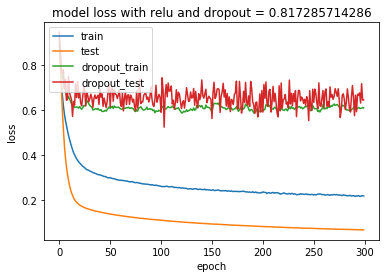

dict_keys(['val_loss', 'loss'])
1.22542857143


/usr/local/lib/python3.5/dist-packages/keras/engine/topology.py:1519: UserWarning: Model inputs must come from a Keras Input layer, they cannot be the output of a previous non-Input layer. Here, a tensor specified as input to "sequential_253_model" was not an Input tensor, it was generated by layer dropout_26.
Note that input tensors are instantiated via `tensor = Input(shape)`.
The tensor that caused the issue was: dropout_26_input:0
  str(x.name))


AttributeError: 'Dropout' object has no attribute 'is_placeholder'

In [27]:
lear_rate = np.linspace(0.001, n_lr)
for i in lear_rate:
    model = Sequential()
    model.add(Dense(200, input_dim=X_train_scaled.shape[1], init='uniform'))
    model.add(Activation('relu'))

    model.add(Dense(1, init='uniform'))
    model.add(Activation('linear'))

    sgd = SGD(lr=0.01)
    model.compile(optimizer=sgd,loss='mean_squared_error')

    hist = model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), nb_epoch=300,
    verbose=0, validation_data=(X_test_scaled.as_matrix(), y_test_scaled.as_matrix()))
    print(hist.history.keys())
    plt.plot(hist.history['val_loss'])
    plt.plot(hist.history['loss'])




    model = Sequential()

    idim=X_train_scaled.shape[1]
    print(i)
    model.add(Dropout(i, input_shape=(idim,)))
    model.add(Dense(200,input_dim=idim,init='uniform'))
    model.add(Activation('relu'))
    model.add(Dense(1, init='uniform'))
    model.add(Activation('linear'))

    sgd = SGD(lr=0.01)
    model.compile(optimizer=sgd,loss='mean_squared_error')

    hist = model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), nb_epoch=300,
    verbose=0, validation_data=(X_test_scaled.as_matrix(), y_test_scaled.as_matrix()))
    print(hist.history.keys())
    plt.plot(hist.history['val_loss'])
    plt.plot(hist.history['loss'])




    plt.title('model loss with relu and dropout = '+ str(i))
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test', 'dropout_train' , 'dropout_test'], loc='upper left')
    plt.show()

<p>Al usar un dropout 0.001 se obitnene mejores resultados, pero al seguir aumentando, se aumenta el error</p>

<h6>Agregando una capa y utilizando 400 neuronas con la función sigmoidal</h6>

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(400, kernel_initializer="uniform", input_dim=13)`
  """
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(400, kernel_initializer="uniform")`
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="uniform")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.5/dist-packages/keras/models.py:834: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


dict_keys(['val_loss', 'loss'])


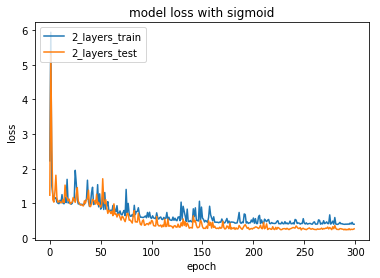

In [40]:



model = Sequential()
model.add(Dense(400, input_dim=X_train_scaled.shape[1], init='uniform'))
model.add(Activation('sigmoid'))

model.add(Dense(400, init='uniform'))
model.add(Activation('sigmoid'))

model.add(Dense(1, init='uniform'))
model.add(Activation('linear'))

sgd = SGD(lr=0.01)
model.compile(optimizer=sgd,loss='mean_squared_error')

hist = model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), nb_epoch=300,
verbose=0, validation_data=(X_test_scaled.as_matrix(), y_test_scaled.as_matrix()))
print(hist.history.keys())
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['loss'])




plt.title('model loss with sigmoid')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['2_layers_train', '2_layers_test'], loc='upper left')
plt.show()


<p>Se observa una convergencia mucho menor al aumentar a dos capas con 400 neuronas</p>

<h6>Agregando una capa y usando 400 neuronas con la función relu</h6>

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(400, kernel_initializer="uniform", input_dim=13)`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="uniform")`
  import sys
/usr/local/lib/python3.5/dist-packages/keras/models.py:834: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


dict_keys(['val_loss', 'loss'])


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(400, kernel_initializer="uniform", input_dim=13)`
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:24: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(400, kernel_initializer="uniform")`
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:27: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="uniform")`


dict_keys(['val_loss', 'loss'])


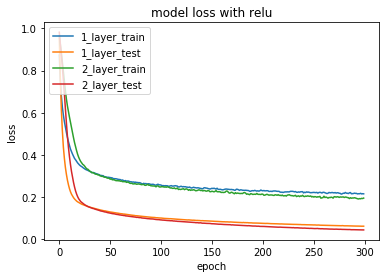

In [41]:

model = Sequential()
model.add(Dense(400, input_dim=X_train_scaled.shape[1], init='uniform'))
model.add(Activation('relu'))


model.add(Dense(1, init='uniform'))
model.add(Activation('linear'))

sgd = SGD(lr=0.01)
model.compile(optimizer=sgd,loss='mean_squared_error')

hist = model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), nb_epoch=300,
verbose=0, validation_data=(X_test_scaled.as_matrix(), y_test_scaled.as_matrix()))
print(hist.history.keys())
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['loss'])


model = Sequential()
model.add(Dense(400, input_dim=X_train_scaled.shape[1], init='uniform'))
model.add(Activation('relu'))

model.add(Dense(400, init='uniform'))
model.add(Activation('relu'))

model.add(Dense(1, init='uniform'))
model.add(Activation('linear'))

sgd = SGD(lr=0.01)
model.compile(optimizer=sgd,loss='mean_squared_error')

hist = model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), nb_epoch=300,
verbose=0, validation_data=(X_test_scaled.as_matrix(), y_test_scaled.as_matrix()))
print(hist.history.keys())
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['loss'])




plt.title('model loss with relu')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['1_layer_train', '1_layer_test', '2_layer_train', '2_layer_test'], loc='upper left')
plt.show()


<p>Para el caso de la función relu se aprecia una pequeña mejor al aumentar a 2 capas y 400 neuronas, pero con una convergencia un poco más lenta en un comienzo</p>

<h6>Comparación en la función sigmoidal sin regularizar, regularizando 1 capa, y regularizando ambas capas escondidas </h6>

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(400, kernel_initializer="uniform", input_dim=13)`
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(400, kernel_initializer="uniform")`
  """
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="uniform")`
  
/usr/local/lib/python3.5/dist-packages/keras/models.py:834: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


dict_keys(['val_loss', 'loss'])


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:27: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(400, kernel_initializer="uniform", input_dim=13)`
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:29: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(400, kernel_initializer="uniform")`
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:31: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="uniform")`


dict_keys(['val_loss', 'loss'])


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:49: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(400, kernel_initializer="uniform", input_dim=13)`
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:52: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(400, kernel_initializer="uniform")`
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:54: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="uniform")`


dict_keys(['val_loss', 'loss'])


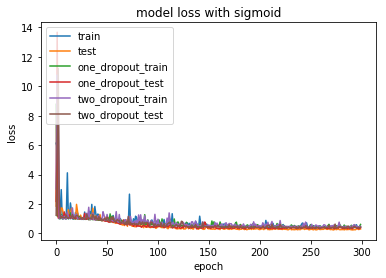

In [30]:
model = Sequential()
model.add(Dense(400, input_dim=X_train_scaled.shape[1], init='uniform'))
model.add(Activation('sigmoid'))

model.add(Dense(400, init='uniform'))
model.add(Activation('sigmoid'))

model.add(Dense(1, init='uniform'))
model.add(Activation('linear'))

sgd = SGD(lr=0.01)
model.compile(optimizer=sgd,loss='mean_squared_error')

hist = model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), nb_epoch=300,
verbose=0, validation_data=(X_test_scaled.as_matrix(), y_test_scaled.as_matrix()))
print(hist.history.keys())
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['loss'])




model = Sequential()

idim=X_train_scaled.shape[1]
model.add(Dropout(0.2, input_shape=(idim,)))
model.add(Dense(400,input_dim=idim,init='uniform'))
model.add(Activation('sigmoid'))
model.add(Dense(400, init='uniform'))
model.add(Activation('sigmoid'))
model.add(Dense(1, init='uniform'))
model.add(Activation('linear'))

sgd = SGD(lr=0.01)
model.compile(optimizer=sgd,loss='mean_squared_error')

hist = model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), nb_epoch=300,
verbose=0, validation_data=(X_test_scaled.as_matrix(), y_test_scaled.as_matrix()))
print(hist.history.keys())
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['loss'])



model = Sequential()

idim=X_train_scaled.shape[1]
model.add(Dropout(0.2, input_shape=(idim,)))
model.add(Dense(400,input_dim=idim,init='uniform'))
model.add(Activation('sigmoid'))
model.add(Dropout(0.2, input_shape=(idim,)))
model.add(Dense(400, init='uniform'))
model.add(Activation('sigmoid'))
model.add(Dense(1, init='uniform'))
model.add(Activation('linear'))

sgd = SGD(lr=0.01)
model.compile(optimizer=sgd,loss='mean_squared_error')

hist = model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), nb_epoch=300,
verbose=0, validation_data=(X_test_scaled.as_matrix(), y_test_scaled.as_matrix()))
print(hist.history.keys())
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['loss'])


plt.title('model loss with sigmoid')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test', 'one_dropout_train', 'one_dropout_test', 'two_dropout_train', 'two_dropout_test'], loc='upper left')
plt.show()


<h6>Comparación en la función relu sin regularizar, regularizando 1 capa, y regularizando ambas capas escondidas </h6>

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(400, kernel_initializer="uniform", input_dim=13)`
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(400, kernel_initializer="uniform")`
  """
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="uniform")`
  
/usr/local/lib/python3.5/dist-packages/keras/models.py:834: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


dict_keys(['val_loss', 'loss'])


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:27: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(400, kernel_initializer="uniform", input_dim=13)`
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:29: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(400, kernel_initializer="uniform")`
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:31: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="uniform")`


dict_keys(['val_loss', 'loss'])


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:49: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(400, kernel_initializer="uniform", input_dim=13)`
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:52: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(400, kernel_initializer="uniform")`
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:54: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="uniform")`


dict_keys(['val_loss', 'loss'])


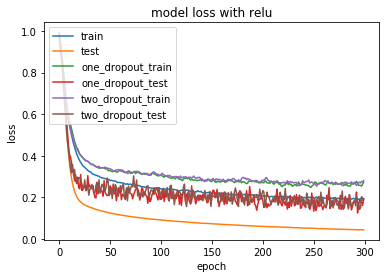

In [31]:
model = Sequential()
model.add(Dense(400, input_dim=X_train_scaled.shape[1], init='uniform'))
model.add(Activation('relu'))

model.add(Dense(400, init='uniform'))
model.add(Activation('relu'))

model.add(Dense(1, init='uniform'))
model.add(Activation('linear'))

sgd = SGD(lr=0.01)
model.compile(optimizer=sgd,loss='mean_squared_error')

hist = model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), nb_epoch=300,
verbose=0, validation_data=(X_test_scaled.as_matrix(), y_test_scaled.as_matrix()))
print(hist.history.keys())
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['loss'])




model = Sequential()

idim=X_train_scaled.shape[1]
model.add(Dropout(0.2, input_shape=(idim,)))
model.add(Dense(400,input_dim=idim,init='uniform'))
model.add(Activation('relu'))
model.add(Dense(400, init='uniform'))
model.add(Activation('relu'))
model.add(Dense(1, init='uniform'))
model.add(Activation('linear'))

sgd = SGD(lr=0.01)
model.compile(optimizer=sgd,loss='mean_squared_error')

hist = model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), nb_epoch=300,
verbose=0, validation_data=(X_test_scaled.as_matrix(), y_test_scaled.as_matrix()))
print(hist.history.keys())
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['loss'])



model = Sequential()

idim=X_train_scaled.shape[1]
model.add(Dropout(0.2, input_shape=(idim,)))
model.add(Dense(400,input_dim=idim,init='uniform'))
model.add(Activation('relu'))
model.add(Dropout(0.2, input_shape=(idim,)))
model.add(Dense(400, init='uniform'))
model.add(Activation('relu'))
model.add(Dense(1, init='uniform'))
model.add(Activation('linear'))

sgd = SGD(lr=0.01)
model.compile(optimizer=sgd,loss='mean_squared_error')

hist = model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), nb_epoch=300,
verbose=0, validation_data=(X_test_scaled.as_matrix(), y_test_scaled.as_matrix()))
print(hist.history.keys())
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['loss'])


plt.title('model loss with relu')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test', 'one_dropout_train', 'one_dropout_test', 'two_dropout_train', 'two_dropout_test'], loc='upper left')
plt.show()


<p> Se aprecia para el caso de la sigmoidal que no se tienen resultados limpios que permitan sacar buenas deducciones. Las curvas se solapan y todas presentan casi la misma forma. En el caso de relu, se tiene un caso distinto, pero siguen siendo mejores resultados el trabajar sin regularización. Mientras más capas se regularizan, peor es el resultado.</p>

<h4>Pregunta M</h4>
<p>Fijando todos los demás hiper-parámetros del modelo definido en c) y d), utilice validación cruzada
para determinar el mejor valor correspondiente a un parámetro que usted elija (tasa de aprendizaje,
número de neuronas, parámetro de regularización, etc).</p>

<h6>Validando para obtener la cantidad de neuronas de la capa escondida en relu</h6>

In [32]:
from sklearn import cross_validation
Xm = X_train_scaled.as_matrix()
ym = y_train_scaled.as_matrix()
kfold = cross_validation.KFold(len(Xm), 10)
cvscores = []
models = []
for i, (train, val) in enumerate(kfold):
    print(i)
    # create model
    model = Sequential()
    model.add(Dense(int(1000 / (i + 1)), input_dim=Xm.shape[1], init='uniform'))
    model.add(Activation('relu'))
    model.add(Dense(1, init='uniform'))
    model.add(Activation('linear'))
    # Compile model
    sgd = SGD(lr=0.2)
    model.compile(optimizer=sgd,loss='mean_squared_error')
    # Fit the model
    model.fit(Xm[train], ym[train], nb_epoch=300, verbose=0)
    # evaluate the model

    scores = model.evaluate(Xm[val], ym[val])
    cvscores.append(scores)
    models.append([models, 1000/ (i + 1),scores])
print(cvscores)
print(models)

0


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1000, kernel_initializer="uniform", input_dim=13)`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="uniform")`
  del sys.path[0]
/usr/local/lib/python3.5/dist-packages/keras/models.py:834: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


32/38 [========================>.....] - ETA: 0s1


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(500, kernel_initializer="uniform", input_dim=13)`
  # This is added back by InteractiveShellApp.init_path()


32/38 [========================>.....] - ETA: 0s2


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(333, kernel_initializer="uniform", input_dim=13)`
  # This is added back by InteractiveShellApp.init_path()


32/38 [========================>.....] - ETA: 0s3


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(250, kernel_initializer="uniform", input_dim=13)`
  # This is added back by InteractiveShellApp.init_path()


32/38 [========================>.....] - ETA: 0s4


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(200, kernel_initializer="uniform", input_dim=13)`
  # This is added back by InteractiveShellApp.init_path()


32/38 [========================>.....] - ETA: 0s5


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(166, kernel_initializer="uniform", input_dim=13)`
  # This is added back by InteractiveShellApp.init_path()


32/38 [========================>.....] - ETA: 0s6


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(142, kernel_initializer="uniform", input_dim=13)`
  # This is added back by InteractiveShellApp.init_path()


32/38 [========================>.....] - ETA: 0s7


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(125, kernel_initializer="uniform", input_dim=13)`
  # This is added back by InteractiveShellApp.init_path()


32/38 [========================>.....] - ETA: 0s8


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(111, kernel_initializer="uniform", input_dim=13)`
  # This is added back by InteractiveShellApp.init_path()


32/38 [========================>.....] - ETA: 0s9


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(100, kernel_initializer="uniform", input_dim=13)`
  # This is added back by InteractiveShellApp.init_path()


32/37 [========================>.....] - ETA: 0s[nan, nan, nan, nan, 0.15135611554509715, nan, 0.16109889471217206, 0.095834124245141677, 0.03358726776940258, 0.051677614953872318]
[[[...], 1000.0, nan], [[...], 500.0, nan], [[...], 333.3333333333333, nan], [[...], 250.0, nan], [[...], 200.0, 0.15135611554509715], [[...], 166.66666666666666, nan], [[...], 142.85714285714286, 0.16109889471217206], [[...], 125.0, 0.095834124245141677], [[...], 111.11111111111111, 0.03358726776940258], [[...], 100.0, 0.051677614953872318]]


<h6>Validando para obtener la cantidad de neuronas de la capa escondida en sigmoidal</h6>


In [33]:
from sklearn import cross_validation
Xm = X_train_scaled.as_matrix()
ym = y_train_scaled.as_matrix()
kfold = cross_validation.KFold(len(Xm), 10)
cvscores = []
models = []
for i, (train, val) in enumerate(kfold):
    print(i)
    # create model
    model = Sequential()
    model.add(Dense(int(1000 / (i + 1)), input_dim=Xm.shape[1], init='uniform'))
    model.add(Activation('sigmoid'))
    model.add(Dense(1, init='uniform'))
    model.add(Activation('linear'))
    # Compile model
    sgd = SGD(lr=0.2)
    model.compile(optimizer=sgd,loss='mean_squared_error')
    # Fit the model
    model.fit(Xm[train], ym[train], nb_epoch=300, verbose=0)
    # evaluate the model

    scores = model.evaluate(Xm[val], ym[val])
    cvscores.append(scores)
    models.append([models, 1000/ (i + 1),scores])
print(cvscores)
print(models)

0


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1000, kernel_initializer="uniform", input_dim=13)`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="uniform")`
  del sys.path[0]
/usr/local/lib/python3.5/dist-packages/keras/models.py:834: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


32/38 [========================>.....] - ETA: 0s1


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(500, kernel_initializer="uniform", input_dim=13)`
  # This is added back by InteractiveShellApp.init_path()


32/38 [========================>.....] - ETA: 0s2


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(333, kernel_initializer="uniform", input_dim=13)`
  # This is added back by InteractiveShellApp.init_path()


32/38 [========================>.....] - ETA: 0s3


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(250, kernel_initializer="uniform", input_dim=13)`
  # This is added back by InteractiveShellApp.init_path()


32/38 [========================>.....] - ETA: 0s4


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(200, kernel_initializer="uniform", input_dim=13)`
  # This is added back by InteractiveShellApp.init_path()


32/38 [========================>.....] - ETA: 0s5


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(166, kernel_initializer="uniform", input_dim=13)`
  # This is added back by InteractiveShellApp.init_path()


32/38 [========================>.....] - ETA: 0s6


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(142, kernel_initializer="uniform", input_dim=13)`
  # This is added back by InteractiveShellApp.init_path()


32/38 [========================>.....] - ETA: 0s7


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(125, kernel_initializer="uniform", input_dim=13)`
  # This is added back by InteractiveShellApp.init_path()


32/38 [========================>.....] - ETA: 0s8


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(111, kernel_initializer="uniform", input_dim=13)`
  # This is added back by InteractiveShellApp.init_path()


32/38 [========================>.....] - ETA: 0s9


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(100, kernel_initializer="uniform", input_dim=13)`
  # This is added back by InteractiveShellApp.init_path()


32/37 [========================>.....] - ETA: 0s[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
[[[...], 1000.0, nan], [[...], 500.0, nan], [[...], 333.3333333333333, nan], [[...], 250.0, nan], [[...], 200.0, nan], [[...], 166.66666666666666, nan], [[...], 142.85714285714286, nan], [[...], 125.0, nan], [[...], 111.11111111111111, nan], [[...], 100.0, nan]]
